# **Predicting heart disease using Machine Learning**

*This notebook looks into various Python Data Science and Machine Learning libraries to build a model capable of predicting whether or not a person has heart disease based on their medical attributes.*

**We are going to use the following approach :**
1. Problem Defenition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement :
>Given clinical parameters about a patient, can we predict whether or not a person has heart disease ?

## 2. Data 

* The original data came from the Cleaveland datset from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
* There is also a version of it availabe in Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

>If we reach 95% accuracy at predicting whether or not a person has heart disease during the proof of concept, we will pursue the project.

## 4. Features 

**Creating a data dictionary**

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (1 = Male; 0 = Female)
5. cp - chest pain type 
     * 0 : typical angina : Chest pain related decrease in blood supply to heart
     * 1 : atypical angina : Chest pain not related to heart
     * 2 : non-anginal : typicaly esophageal spasms (non heart related)
     * 3 : asymptomatic : chest pain not showing signs of disease 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130 - 140 is typically cause for concern.
5. chol (serum cholesterol in mg/dl)
    * serum = LDL + HDL + .2*triglycerides
    * above 200 is cause for concern
6. fbs (if fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes 
7. restecg (resting electrocardiographic results)
    * 0 : Nothing to note
    * 1 : ST-T Wave abnormality 
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2 : Possible or defenite left ventricular hypertrophy
        * Enlarged heart's main pumping chmaber
8. thalach: maximum heart rate achieved
9. exang: exercise-induced angina (1 = yes; 2 = no)
10. oldpeak: ST depression induced by exercise relative to rest looks at the stress of heart duting exersice unhealthy heart will stress more.
11. slope: the slope of the peak exercise ST segment
    * 0 : Upsloping : better heart rate with excercise (Uncommon)
    * 1 : Flatsloping : minimal change (typical healthy heart)
    * 2 : Downslopins : signs of unhealthy heart
12. ca: number of major vessels (0-3) colored by fluoroscopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal: thalium stress result
    * 1, 3 : normal
    * 6 : fixed defect : used to be defect but now ok
    * 7 : reversible defect
14. target: the predicted attribute

### Preparing the tools 

* We will be using pandas, numpy and matplotlib for data analysis and manipulation.


In [2]:
# Importing all the tools required

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# We want to view the plots in the IDE

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

## Loading the data

In [3]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration (Exploratory data analysis or EDA)

* The goal here is to find out more about the data and become a subject data expert on the data you are working on.

1. What question(s) are we trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. Whats missing from the data and how do we deal with it ?
4. Where are the outliers and why should you care about them ? 

>In Exploratory Data Analysis (EDA), outliers refer to data points that significantly differ from the rest of the observations in a dataset. Outliers can be unusual values that are much higher or lower than the majority of the data points.

5. How can you add, change or remove features to get more out of your data ?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Lets find out how many of each class are there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

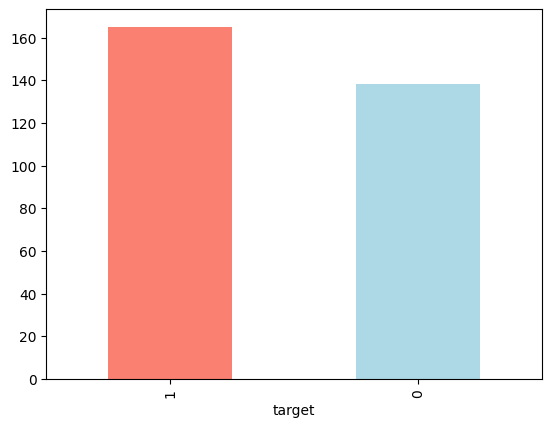

In [7]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing data ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


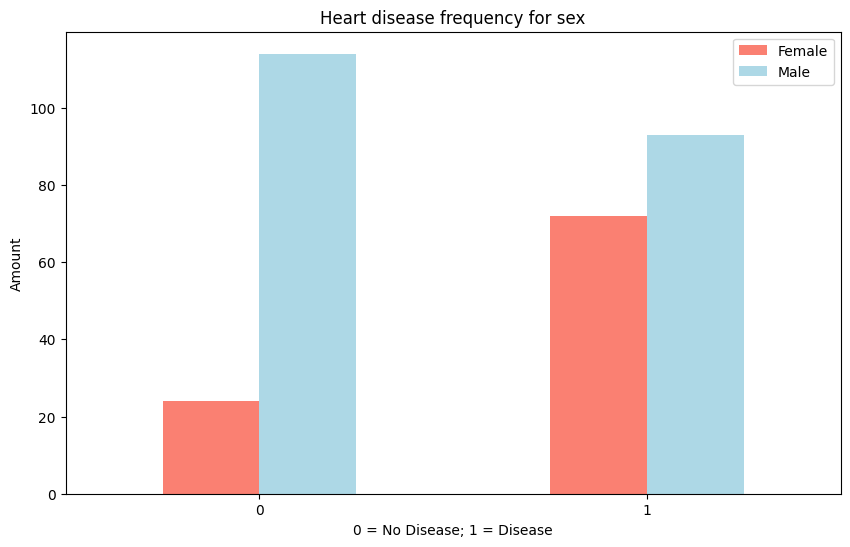

In [13]:
# Plotting the crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['Salmon', 'Lightblue']);

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease; 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [14]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

#### Age vs Thalach (Max. heart rate achieved) for heart disease

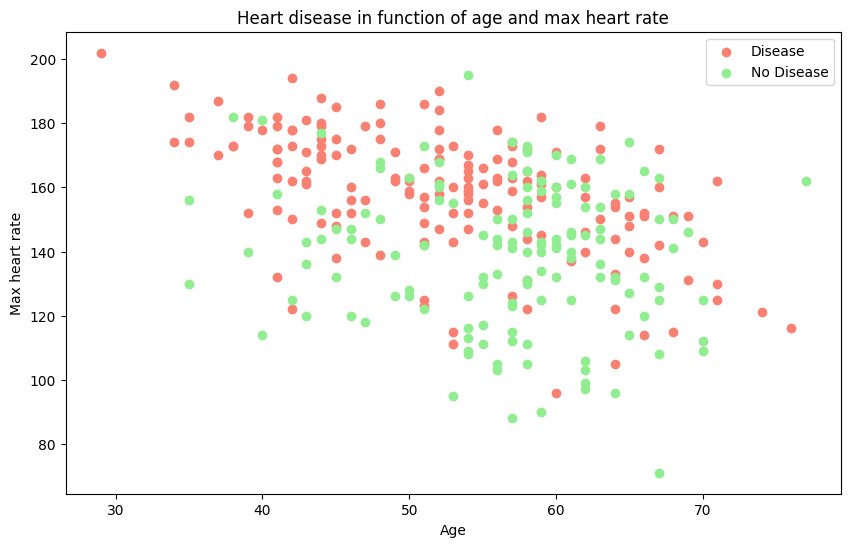

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter plot with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'salmon');

# Scatter plot with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightgreen');

# Adding some helpful info
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease']);

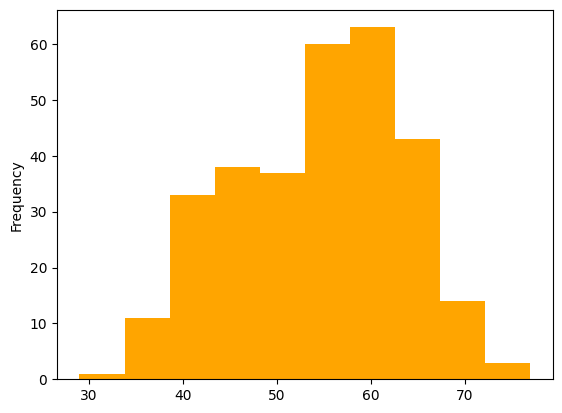

In [16]:
# Checking distribution of age column with histogram
df.age.plot.hist(color = 'orange');

#### Heart disease frequency per chest pain type

* cp - chest pain type 
     * 0 : typical angina : Chest pain related decrease in blood supply to heart
     * 1 : atypical angina : Chest pain not related to heart
     * 2 : non-anginal : typicaly esophageal spasms (non heart related)
     * 3 : asymptomatic : chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


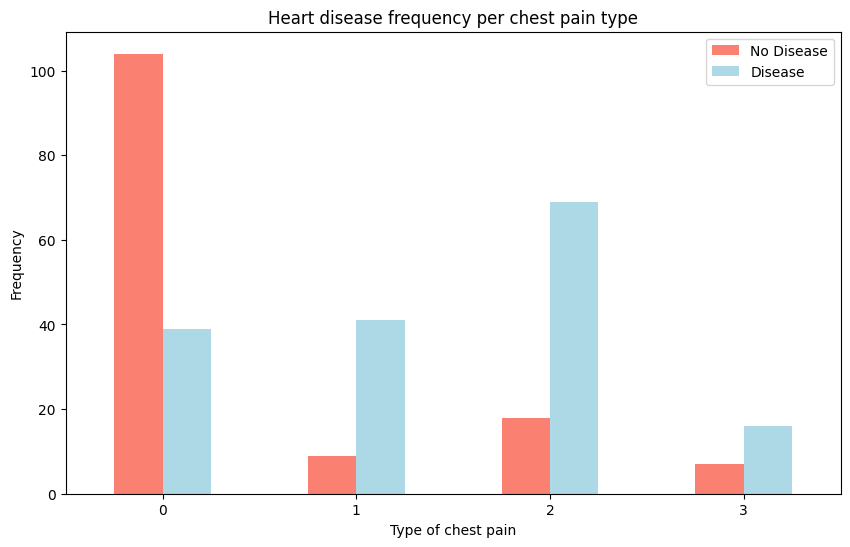

In [18]:
# MAking a visual representation of the crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=[10, 6],
                                   color = ['salmon', 'lightblue']);

# Making it more informative
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Type of chest pain')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);

#### Correlation matrix


> A correlation matrix is a table that displays the correlation coefficients between multiple variables. Correlation coefficients measure the strength and direction of the linear relationship between two variables. 

* They range from -1 to 1, where:

    * 1 indicates a perfect positive linear relationship,
    * -1 indicates a perfect negative linear relationship, and
    * 0 indicates no linear relationship.

* Each variable in the data set is compared with every other variable, including itself, resulting in a square matrix where the diagonal elements are always 1 (since each variable is perfectly correlated with itself).

* *Here's a breakdown of what a correlation matrix typically looks like:*

    * `Variables`: The rows and columns of the matrix represent the variables being compared.
    * `Correlation Coefficients`: The cells of the matrix contain the correlation coefficients between the respective pairs of variables.
    * `Symmetry`: The matrix is symmetric across the diagonal. This means that the correlation between variable X and variable Y is the same as the correlation between variable Y and variable X.
    * `Diagonal`: The diagonal elements of the matrix always have a correlation coefficient of 1 since each variable perfectly correlates with itself.

* Correlation matrices are often used in statistics and data analysis for several purposes:

    * **Identifying Relationships**: They help identify whether variables are positively, negatively, or not correlated with each other.
    * **Multicollinearity Detection**: In regression analysis, multicollinearity occurs when independent variables are highly correlated with each other. Correlation matrices can help detect this issue.
    * **Variable Selection**: When building predictive models, variables that are highly correlated with the target variable may be good candidates for inclusion in the model.
    * **Data Exploration**: They provide insights into the underlying structure of the data and can guide further analysis.
    
In summary, correlation matrices are powerful tools for understanding the relationships between variables in a dataset, aiding in exploratory data analysis and modeling tasks.

In [19]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


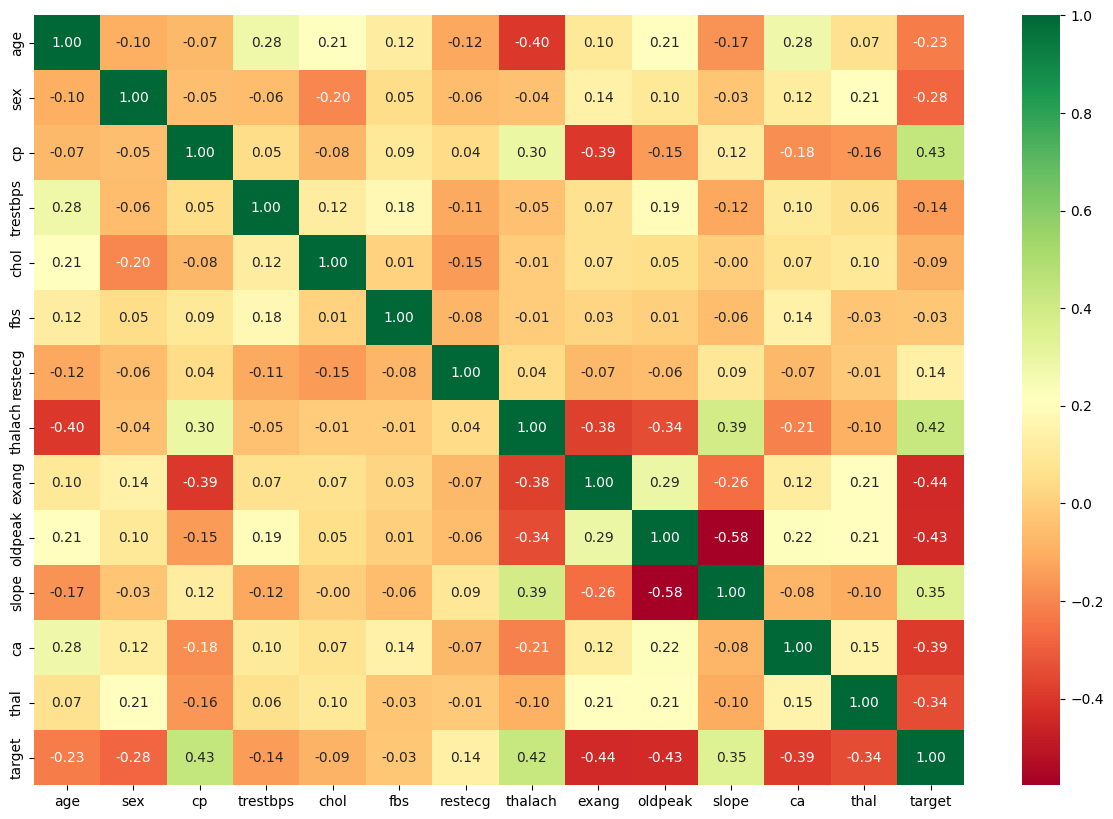

In [20]:
# Make the matrix more visualized 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = [15, 10])
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 fmt= '.2f',
                 cmap= 'RdYlGn');

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and Y
X = df.drop('target', axis=1)
y = df['target']

np.random.seed(45)

# Creating train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

* The data has been split into training and test data.
* We will train it (find patterns) on the training set. 
* And then we will test it (use the pattern) on the test set.
* We are going to try 3 different machine learning models :
    1. Logistic Regression
    2. K-nearest neighbours classifiers
    3. Random Forest Classifier

In [23]:
# Putting models in a dictionary 

models = {'Logistic Regression' : LogisticRegression(),
          'K-nearest Neighbors Classifier' : KNeighborsClassifier(),
          'Random Forest Classifier' : RandomForestClassifier()}

# Creating a function for fitting and scoring the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and trains the model then provide a score usind the test data set.
    About the parameters :-
    * models : Provide the variable containing the models.
    * X_train : Training data without the labels
    * X_test : Test data without the labels
    * y_train : Training labels
    * y_test : Test labels 

    '''

    # Set a random seed 
    np.random.seed(45)

    # Model score dictionary to append the scores 
    model_score = {}

    # Looping through models
    for name, model in models.items():
        # Fitting the model  
        model.fit(X_train, y_train)

        # Appending the score of the model into the dictionary
        model_score[name] = model.score(X_test, y_test)        

    return model_score

In [24]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)
model_score


C:\Users\riwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.868421052631579,
 'K-nearest Neighbors Classifier': 0.618421052631579,
 'Random Forest Classifier': 0.8157894736842105}

### Model Comparison

<Axes: >

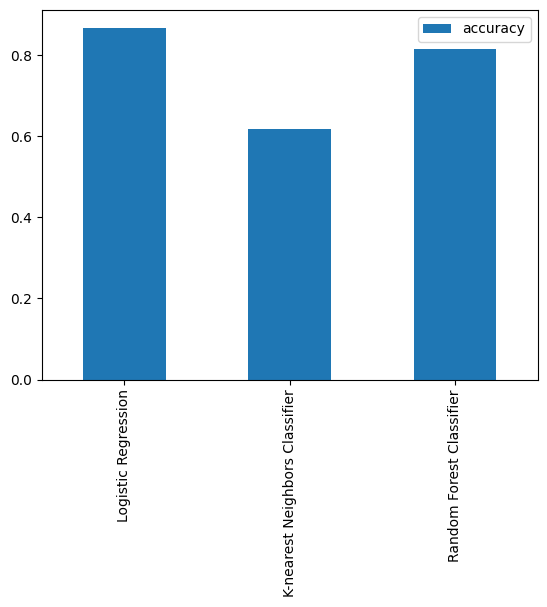

In [25]:
model_comapre = pd.DataFrame(model_score, index=['accuracy'])
model_comapre.T.plot.bar()


Now that we have got our baseline model ... we know that this isnt what we should base our next steps off. What should we do ?

Look at the following :
* Hyperparameter tuning 
* Feature importance
* Confusion matrix
* Cross-validation 
* Precision 
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (By hand)

In [26]:
# Tuning KNN

training_scores = []
test_scores = []

# Assigning different values for a parameter 
neighbours = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Looping through different parameter values
for i in neighbours:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Updating the training score list
    training_scores.append(knn.score(X_train, y_train))

    # Updating the test score list 
    test_scores.append(knn.score(X_test, y_test))


In [27]:
training_scores

[1.0,
 0.801762114537445,
 0.7929515418502202,
 0.775330396475771,
 0.762114537444934,
 0.7577092511013216,
 0.73568281938326,
 0.7224669603524229,
 0.7136563876651982,
 0.6872246696035242,
 0.6916299559471366,
 0.6828193832599119,
 0.6828193832599119,
 0.6960352422907489,
 0.6916299559471366,
 0.6784140969162996,
 0.6696035242290749,
 0.7048458149779736,
 0.7048458149779736,
 0.7004405286343612]

In [28]:
test_scores

[0.6447368421052632,
 0.5526315789473685,
 0.631578947368421,
 0.631578947368421,
 0.618421052631579,
 0.6447368421052632,
 0.6578947368421053,
 0.6578947368421053,
 0.6447368421052632,
 0.6578947368421053,
 0.6842105263157895,
 0.6842105263157895,
 0.6973684210526315,
 0.6842105263157895,
 0.7105263157894737,
 0.6842105263157895,
 0.6842105263157895,
 0.7236842105263158,
 0.7105263157894737,
 0.7105263157894737]

Maximum KNN score on test data : 72.37%


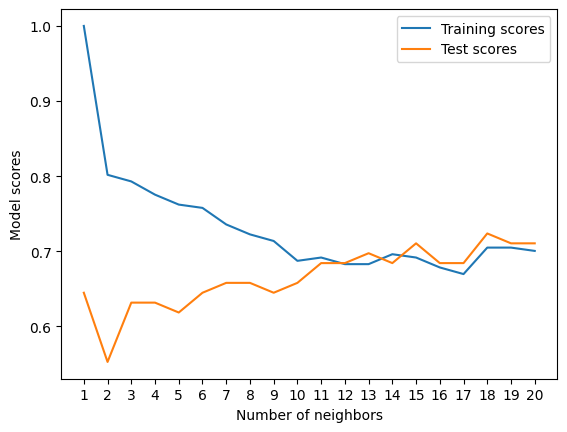

In [29]:
plt.plot(neighbours, training_scores, label= 'Training scores')
plt.plot(neighbours, test_scores, label= 'Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model scores')
plt.legend();

print(f'Maximum KNN score on test data : {max(test_scores) * 100 :.2f}%')

### Hyperparameter tuning using RandomisedSearch CV 

We are going to tune :
* Logistic Regression ()
* Random Forest Classifier ()

... using randomised search cv.

In [30]:
# Creating a hyperparameter grid for logistic regression

log_reg_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [200],
    'class_weight': ['balanced'],  # Custom dictionary example
    'dual': [False],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Creating a hyperparameter grid for RandomForestClassifier

ran_for_class = {
    'n_estimators': np.arange(10, 1000, 50),
    # Definition: Number of trees in the forest.
    # Simple Explanation: Number of trees to include in the forest. More trees can make predictions more robust but might take longer to train.

    'criterion': ['gini', 'entropy'],
    # Definition: Function to measure the quality of a split.
    # Simple Explanation: Criterion for deciding how to split the data at each node of the tree. Options are 'gini' or 'entropy'.

    'max_depth': [None, 3, 5, 10, 20],
    # Definition: Maximum depth of the tree.
    # Simple Explanation: Maximum number of levels the tree can have. Helps prevent overfitting by limiting how deep the tree can grow.

    'min_samples_split': np.arange(2, 30, 2),
    # Definition: Minimum number of samples required to split an internal node.
    # Simple Explanation: Minimum number of samples needed at a node to consider splitting it further. Helps control tree growth.

    'min_samples_leaf': np.arange(1, 30, 2),
    # Definition: Minimum number of samples required to be at a leaf node.
    # Simple Explanation: Minimum number of samples required to be at a leaf node (end of a branch). Helps prevent overfitting by ensuring each leaf has enough data.

    'max_features': ['sqrt', 'log2'],
    # Definition: Number of features to consider when looking for the best split.
    # Simple Explanation: Number of features to consider when deciding how to split a node. 'auto' uses all features, 'sqrt' uses the square root of the number of features, and 'log2' uses the logarithm base 2 of the number of features.

    'bootstrap': [True, False],
    # Definition: Whether to bootstrap samples when building trees.
    # Simple Explanation: Whether to use bootstrapping (sampling with replacement) when building trees. Bootstrapping introduces randomness and diversity into the forest.

    'random_state': [None, 42],
    # Definition: Seed for random number generation.
    # Simple Explanation: Seed value for the random number generator. Setting a seed ensures reproducibility of results.

    'class_weight': [None, 'balanced', 'balanced_subsample'],
    # Definition: Weights associated with classes in the form {class_label: weight}.
    # Simple Explanation: Weights to assign to classes. 'balanced' automatically adjusts weights inversely proportional to class frequencies. 'balanced_subsample' does the same for bootstrapped samples.

    'n_jobs': [None, -1],
    # Definition: Number of jobs to run in parallel for both fit and predict.
    # Simple Explanation: Number of CPU cores to use for training and prediction. Setting to -1 uses all available cores.

    'verbose': [0, 1, 2],
    # Definition: Controls the verbosity when fitting and predicting.
    # Simple Explanation: Controls how much information the model prints during training and prediction. 0 means silent, 1 means some information, and 2 means a lot of information.
}



Now then as we have got hyperparameter grids for tuning, lets tune them using RandomisedSearch CV.

In [31]:
# Tuning Logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True,
                                error_score='raise')

# Fitting the data
rs_log_reg.fit(X_train, y_train)

C:\Users\riwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
                   n_iter=20,
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'class_weight': ['balanced'],
                                        'dual': [False], 'max_iter': [200],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear'],
                                        'tol': [0.0001, 1e-05, 1e-06]},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'tol': 0.0001,
 'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 200,
 'dual': False,
 'class_weight': 'balanced',
 'C': 1.0}

In [33]:
rs_log_reg.score(X_test, y_test)

0.881578947368421

Now that we have tuned logisticRegression(), we will do the same for RandomForestClassifier()

In [34]:
# Tuning RandomForestClassifier()

np.random.seed(42)

rs_ran_for_class = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = ran_for_class,
                                cv = 5,
                                n_iter = 20,
                                verbose = True,
                                error_score='raise')

# Fitting the data
rs_ran_for_class.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60
building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 60building tree 2 of 60
building tree 3 of 60

building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


building tree 17 of 60building tree 18 of 60

building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tr

[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished


building tree 36 of 60building tree 37 of 60
building tree 38 of 60

building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360
building tree 11 of 360
building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360
building tree 17 of 360
building tree 18 of 360
building tree 19 of 360
building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360
building tree 26 of 360
building tree 27 of 360
building tree 28 of 360
building tree 29 of 360
building tree 30 of 360
building tree 31 of 360
building tree 32 of 360
building tree 33 of 360
building tree 34 of 360
building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360
building tree 40 of 360
building tree 41 of 360
building tree 42 of 360
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 140 of 360
building tree 141 of 360
building tree 142 of 360
building tree 143 of 360
building tree 144 of 360
building tree 145 of 360
building tree 146 of 360
building tree 147 of 360
building tree 148 of 360
building tree 149 of 360
building tree 150 of 360
building tree 151 of 360
building tree 152 of 360
building tree 153 of 360
building tree 154 of 360
building tree 155 of 360
building tree 156 of 360
building tree 157 of 360
building tree 158 of 360
building tree 159 of 360
building tree 160 of 360
building tree 161 of 360
building tree 162 of 360
building tree 163 of 360
building tree 164 of 360
building tree 165 of 360
building tree 166 of 360
building tree 167 of 360
building tree 168 of 360
building tree 169 of 360
building tree 170 of 360
building tree 171 of 360
building tree 172 of 360
building tree 173 of 360
building tree 174 of 360
building tree 175 of 360
building tree 176 of 360
building tree 177 of 360
building tree 178 of 360
building tree 179 of 360


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360
building tree 11 of 360
building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360
building tree 17 of 360
building tree 18 of 360
building tree 19 of 360
building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360
building tree 26 of 360
building tree 27 of 360
building tree 28 of 360
building tree 29 of 360
building tree 30 of 360
building tree 31 of 360
building tree 32 of 360
building tree 33 of 360
building tree 34 of 360
building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360
building tree 40 of 360
building tree 41 of 360
building tree 42 of 360
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 114 of 360
building tree 115 of 360
building tree 116 of 360
building tree 117 of 360
building tree 118 of 360
building tree 119 of 360
building tree 120 of 360
building tree 121 of 360
building tree 122 of 360
building tree 123 of 360
building tree 124 of 360
building tree 125 of 360
building tree 126 of 360
building tree 127 of 360
building tree 128 of 360
building tree 129 of 360
building tree 130 of 360
building tree 131 of 360
building tree 132 of 360
building tree 133 of 360
building tree 134 of 360
building tree 135 of 360
building tree 136 of 360
building tree 137 of 360
building tree 138 of 360
building tree 139 of 360
building tree 140 of 360
building tree 141 of 360
building tree 142 of 360
building tree 143 of 360
building tree 144 of 360
building tree 145 of 360
building tree 146 of 360
building tree 147 of 360
building tree 148 of 360
building tree 149 of 360
building tree 150 of 360
building tree 151 of 360
building tree 152 of 360
building tree 153 of 360


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360
building tree 11 of 360
building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360
building tree 17 of 360
building tree 18 of 360
building tree 19 of 360
building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360
building tree 26 of 360
building tree 27 of 360
building tree 28 of 360
building tree 29 of 360
building tree 30 of 360
building tree 31 of 360
building tree 32 of 360
building tree 33 of 360
building tree 34 of 360
building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360
building tree 40 of 360
building tree 41 of 360
building tree 42 of 360
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 131 of 360
building tree 132 of 360
building tree 133 of 360
building tree 134 of 360
building tree 135 of 360
building tree 136 of 360
building tree 137 of 360
building tree 138 of 360
building tree 139 of 360
building tree 140 of 360
building tree 141 of 360
building tree 142 of 360
building tree 143 of 360
building tree 144 of 360
building tree 145 of 360
building tree 146 of 360
building tree 147 of 360
building tree 148 of 360
building tree 149 of 360
building tree 150 of 360
building tree 151 of 360
building tree 152 of 360
building tree 153 of 360
building tree 154 of 360
building tree 155 of 360
building tree 156 of 360
building tree 157 of 360
building tree 158 of 360
building tree 159 of 360
building tree 160 of 360
building tree 161 of 360
building tree 162 of 360
building tree 163 of 360
building tree 164 of 360
building tree 165 of 360
building tree 166 of 360
building tree 167 of 360
building tree 168 of 360
building tree 169 of 360
building tree 170 of 360


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360
building tree 11 of 360
building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360
building tree 17 of 360
building tree 18 of 360
building tree 19 of 360
building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360
building tree 26 of 360
building tree 27 of 360
building tree 28 of 360
building tree 29 of 360
building tree 30 of 360
building tree 31 of 360
building tree 32 of 360
building tree 33 of 360
building tree 34 of 360
building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360
building tree 40 of 360
building tree 41 of 360
building tree 42 of 360
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 107 of 360
building tree 108 of 360
building tree 109 of 360
building tree 110 of 360
building tree 111 of 360
building tree 112 of 360
building tree 113 of 360
building tree 114 of 360
building tree 115 of 360
building tree 116 of 360
building tree 117 of 360
building tree 118 of 360
building tree 119 of 360
building tree 120 of 360
building tree 121 of 360
building tree 122 of 360
building tree 123 of 360
building tree 124 of 360
building tree 125 of 360
building tree 126 of 360
building tree 127 of 360
building tree 128 of 360
building tree 129 of 360
building tree 130 of 360
building tree 131 of 360
building tree 132 of 360
building tree 133 of 360
building tree 134 of 360
building tree 135 of 360
building tree 136 of 360
building tree 137 of 360
building tree 138 of 360
building tree 139 of 360
building tree 140 of 360
building tree 141 of 360
building tree 142 of 360
building tree 143 of 360
building tree 144 of 360
building tree 145 of 360
building tree 146 of 360


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 238 of 360
building tree 239 of 360
building tree 240 of 360
building tree 241 of 360
building tree 242 of 360
building tree 243 of 360
building tree 244 of 360
building tree 245 of 360
building tree 246 of 360
building tree 247 of 360
building tree 248 of 360
building tree 249 of 360
building tree 250 of 360
building tree 251 of 360
building tree 252 of 360
building tree 253 of 360
building tree 254 of 360
building tree 255 of 360
building tree 256 of 360
building tree 257 of 360
building tree 258 of 360
building tree 259 of 360
building tree 260 of 360
building tree 261 of 360
building tree 262 of 360
building tree 263 of 360
building tree 264 of 360
building tree 265 of 360
building tree 266 of 360
building tree 267 of 360
building tree 268 of 360
building tree 269 of 360
building tree 270 of 360
building tree 271 of 360
building tree 272 of 360
building tree 273 of 360
building tree 274 of 360
building tree 275 of 360
building tree 276 of 360
building tree 277 of 360


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360
building tree 11 of 360
building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360
building tree 17 of 360
building tree 18 of 360
building tree 19 of 360
building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360
building tree 26 of 360
building tree 27 of 360
building tree 28 of 360
building tree 29 of 360
building tree 30 of 360
building tree 31 of 360
building tree 32 of 360
building tree 33 of 360
building tree 34 of 360
building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360
building tree 40 of 360
building tree 41 of 360
building tree 42 of 360
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 129 of 360
building tree 130 of 360
building tree 131 of 360
building tree 132 of 360
building tree 133 of 360
building tree 134 of 360
building tree 135 of 360
building tree 136 of 360
building tree 137 of 360
building tree 138 of 360
building tree 139 of 360
building tree 140 of 360
building tree 141 of 360
building tree 142 of 360
building tree 143 of 360
building tree 144 of 360
building tree 145 of 360
building tree 146 of 360
building tree 147 of 360
building tree 148 of 360
building tree 149 of 360
building tree 150 of 360
building tree 151 of 360
building tree 152 of 360
building tree 153 of 360
building tree 154 of 360
building tree 155 of 360
building tree 156 of 360
building tree 157 of 360
building tree 158 of 360
building tree 159 of 360
building tree 160 of 360
building tree 161 of 360
building tree 162 of 360
building tree 163 of 360
building tree 164 of 360
building tree 165 of 360
building tree 166 of 360
building tree 167 of 360
building tree 168 of 360


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 240 of 360
building tree 241 of 360
building tree 242 of 360
building tree 243 of 360
building tree 244 of 360
building tree 245 of 360
building tree 246 of 360
building tree 247 of 360
building tree 248 of 360
building tree 249 of 360
building tree 250 of 360
building tree 251 of 360
building tree 252 of 360
building tree 253 of 360
building tree 254 of 360
building tree 255 of 360
building tree 256 of 360
building tree 257 of 360
building tree 258 of 360
building tree 259 of 360
building tree 260 of 360
building tree 261 of 360
building tree 262 of 360
building tree 263 of 360
building tree 264 of 360
building tree 265 of 360
building tree 266 of 360
building tree 267 of 360
building tree 268 of 360
building tree 269 of 360
building tree 270 of 360
building tree 271 of 360
building tree 272 of 360
building tree 273 of 360
building tree 274 of 360
building tree 275 of 360
building tree 276 of 360
building tree 277 of 360
building tree 278 of 360
building tree 279 of 360


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[P

building tree 1 of 660building tree 2 of 660

building tree 3 of 660
building tree 4 of 660
building tree 5 of 660
building tree 6 of 660
building tree 7 of 660
building tree 8 of 660
building tree 9 of 660
building tree 10 of 660
building tree 11 of 660
building tree 12 of 660
building tree 13 of 660
building tree 14 of 660
building tree 15 of 660
building tree 16 of 660
building tree 17 of 660
building tree 18 of 660
building tree 19 of 660
building tree 20 of 660
building tree 21 of 660
building tree 22 of 660
building tree 23 of 660
building tree 24 of 660
building tree 25 of 660
building tree 26 of 660
building tree 27 of 660
building tree 28 of 660
building tree 29 of 660
building tree 30 of 660
building tree 31 of 660
building tree 32 of 660
building tree 33 of 660
building tree 34 of 660
building tree 35 of 660
building tree 36 of 660
building tree 37 of 660
building tree 38 of 660
building tree 39 of 660
building tree 40 of 660
building tree 41 of 660
building tree 42 of 660
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.4s


building tree 563 of 660building tree 564 of 660

building tree 565 of 660
building tree 566 of 660
building tree 567 of 660
building tree 568 of 660
building tree 569 of 660
building tree 570 of 660
building tree 571 of 660
building tree 572 of 660
building tree 573 of 660
building tree 574 of 660
building tree 575 of 660
building tree 576 of 660
building tree 577 of 660
building tree 578 of 660
building tree 579 of 660
building tree 580 of 660
building tree 581 of 660
building tree 582 of 660
building tree 583 of 660
building tree 584 of 660
building tree 585 of 660
building tree 586 of 660
building tree 587 of 660
building tree 588 of 660
building tree 589 of 660
building tree 590 of 660
building tree 591 of 660
building tree 592 of 660
building tree 593 of 660
building tree 594 of 660
building tree 595 of 660
building tree 596 of 660
building tree 597 of 660
building tree 598 of 660
building tree 599 of 660
building tree 600 of 660
building tree 601 of 660
building tree 602 of 660


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 660
building tree 2 of 660
building tree 3 of 660
building tree 4 of 660
building tree 5 of 660
building tree 6 of 660
building tree 7 of 660
building tree 8 of 660
building tree 9 of 660
building tree 10 of 660
building tree 11 of 660
building tree 12 of 660
building tree 13 of 660
building tree 14 of 660
building tree 15 of 660
building tree 16 of 660
building tree 17 of 660
building tree 18 of 660
building tree 19 of 660
building tree 20 of 660
building tree 21 of 660
building tree 22 of 660
building tree 23 of 660
building tree 24 of 660
building tree 25 of 660
building tree 26 of 660
building tree 27 of 660
building tree 28 of 660
building tree 29 of 660
building tree 30 of 660
building tree 31 of 660
building tree 32 of 660
building tree 33 of 660
building tree 34 of 660
building tree 35 of 660
building tree 36 of 660
building tree 37 of 660
building tree 38 of 660
building tree 39 of 660
building tree 40 of 660
building tree 41 of 660
building tree 42 of 660
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 407 of 660building tree 406 of 660

building tree 408 of 660
building tree 409 of 660
building tree 410 of 660
building tree 411 of 660
building tree 412 of 660
building tree 413 of 660
building tree 414 of 660
building tree 415 of 660
building tree 416 of 660
building tree 417 of 660
building tree 418 of 660
building tree 419 of 660
building tree 420 of 660
building tree 421 of 660
building tree 422 of 660
building tree 423 of 660
building tree 424 of 660
building tree 425 of 660
building tree 426 of 660
building tree 427 of 660
building tree 428 of 660
building tree 429 of 660
building tree 430 of 660
building tree 431 of 660
building tree 432 of 660
building tree 433 of 660
building tree 434 of 660
building tree 435 of 660
building tree 436 of 660
building tree 437 of 660
building tree 438 of 660
building tree 439 of 660
building tree 440 of 660
building tree 441 of 660
building tree 442 of 660
building tree 443 of 660
building tree 444 of 660
building tree 445 of 660


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 660building tree 2 of 660

building tree 3 of 660
building tree 4 of 660
building tree 5 of 660
building tree 6 of 660
building tree 7 of 660
building tree 8 of 660
building tree 9 of 660
building tree 10 of 660
building tree 11 of 660
building tree 12 of 660
building tree 13 of 660
building tree 14 of 660
building tree 15 of 660
building tree 16 of 660
building tree 17 of 660
building tree 18 of 660
building tree 19 of 660
building tree 20 of 660
building tree 21 of 660
building tree 22 of 660
building tree 23 of 660
building tree 24 of 660
building tree 25 of 660
building tree 26 of 660
building tree 27 of 660
building tree 28 of 660
building tree 29 of 660
building tree 30 of 660
building tree 31 of 660
building tree 32 of 660
building tree 33 of 660
building tree 34 of 660
building tree 35 of 660
building tree 36 of 660
building tree 37 of 660
building tree 38 of 660
building tree 39 of 660
building tree 40 of 660
building tree 41 of 660
building tree 42 of 660
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 363 of 660building tree 364 of 660

building tree 365 of 660
building tree 366 of 660
building tree 367 of 660
building tree 368 of 660
building tree 369 of 660
building tree 370 of 660
building tree 371 of 660
building tree 372 of 660
building tree 373 of 660
building tree 374 of 660
building tree 375 of 660
building tree 376 of 660
building tree 377 of 660
building tree 378 of 660
building tree 379 of 660
building tree 380 of 660
building tree 381 of 660
building tree 382 of 660
building tree 383 of 660
building tree 384 of 660
building tree 385 of 660
building tree 386 of 660
building tree 387 of 660
building tree 388 of 660
building tree 389 of 660
building tree 390 of 660
building tree 391 of 660
building tree 392 of 660
building tree 393 of 660
building tree 394 of 660
building tree 395 of 660
building tree 396 of 660
building tree 397 of 660
building tree 398 of 660
building tree 399 of 660
building tree 400 of 660
building tree 401 of 660
building tree 402 of 660


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s


building tree 1 of 660building tree 2 of 660
building tree 3 of 660

building tree 4 of 660
building tree 5 of 660
building tree 6 of 660
building tree 7 of 660
building tree 8 of 660
building tree 9 of 660
building tree 10 of 660
building tree 11 of 660
building tree 12 of 660
building tree 13 of 660
building tree 14 of 660
building tree 15 of 660
building tree 16 of 660
building tree 17 of 660
building tree 18 of 660
building tree 19 of 660
building tree 20 of 660
building tree 21 of 660
building tree 22 of 660
building tree 23 of 660
building tree 24 of 660
building tree 25 of 660
building tree 26 of 660
building tree 27 of 660
building tree 28 of 660
building tree 29 of 660
building tree 30 of 660
building tree 31 of 660
building tree 32 of 660
building tree 33 of 660
building tree 34 of 660
building tree 35 of 660
building tree 36 of 660
building tree 37 of 660
building tree 38 of 660
building tree 39 of 660
building tree 40 of 660
building tree 41 of 660
building tree 42 of 660
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.2s


building tree 492 of 660
building tree 493 of 660
building tree 494 of 660
building tree 495 of 660
building tree 496 of 660
building tree 497 of 660
building tree 498 of 660
building tree 499 of 660
building tree 500 of 660
building tree 501 of 660
building tree 502 of 660
building tree 503 of 660
building tree 504 of 660
building tree 505 of 660
building tree 506 of 660
building tree 507 of 660
building tree 508 of 660
building tree 509 of 660
building tree 510 of 660
building tree 511 of 660
building tree 512 of 660
building tree 513 of 660
building tree 514 of 660
building tree 515 of 660
building tree 516 of 660
building tree 517 of 660
building tree 518 of 660
building tree 519 of 660
building tree 520 of 660
building tree 521 of 660
building tree 522 of 660
building tree 523 of 660
building tree 524 of 660
building tree 525 of 660
building tree 526 of 660
building tree 527 of 660
building tree 528 of 660
building tree 529 of 660
building tree 530 of 660
building tree 531 of 660


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 660
building tree 2 of 660
building tree 3 of 660
building tree 4 of 660
building tree 5 of 660
building tree 6 of 660
building tree 7 of 660
building tree 8 of 660
building tree 9 of 660
building tree 10 of 660
building tree 11 of 660
building tree 12 of 660
building tree 13 of 660
building tree 14 of 660
building tree 15 of 660
building tree 16 of 660
building tree 17 of 660
building tree 18 of 660
building tree 19 of 660
building tree 20 of 660
building tree 21 of 660
building tree 22 of 660
building tree 23 of 660
building tree 24 of 660
building tree 25 of 660
building tree 26 of 660
building tree 27 of 660
building tree 28 of 660
building tree 29 of 660
building tree 30 of 660
building tree 31 of 660
building tree 32 of 660
building tree 33 of 660
building tree 34 of 660
building tree 35 of 660
building tree 36 of 660
building tree 37 of 660
building tree 38 of 660
building tree 39 of 660
building tree 40 of 660
building tree 41 of 660
building tree 42 of 660
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.2s


building tree 466 of 660building tree 467 of 660
building tree 468 of 660

building tree 469 of 660
building tree 470 of 660
building tree 471 of 660
building tree 472 of 660
building tree 473 of 660
building tree 474 of 660
building tree 475 of 660
building tree 476 of 660
building tree 477 of 660
building tree 478 of 660
building tree 479 of 660
building tree 480 of 660
building tree 481 of 660
building tree 482 of 660
building tree 483 of 660
building tree 484 of 660
building tree 485 of 660
building tree 486 of 660
building tree 487 of 660
building tree 488 of 660
building tree 489 of 660
building tree 490 of 660
building tree 491 of 660
building tree 492 of 660
building tree 493 of 660
building tree 494 of 660
building tree 495 of 660
building tree 496 of 660
building tree 497 of 660
building tree 498 of 660
building tree 499 of 660
building tree 500 of 660
building tree 501 of 660
building tree 502 of 660
building tree 503 of 660
building tree 504 of 660
building tree 505 of 660


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 660 out of 660 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 260building tree 2 of 260
building tree 3 of 260
building tree 4 of 260

building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 146 of 260
building tree 147 of 260
building tree 148 of 260
building tree 149 of 260
building tree 150 of 260
building tree 151 of 260
building tree 152 of 260
building tree 153 of 260
building tree 154 of 260
building tree 155 of 260
building tree 156 of 260
building tree 157 of 260
building tree 158 of 260
building tree 159 of 260
building tree 160 of 260
building tree 161 of 260
building tree 162 of 260
building tree 163 of 260
building tree 164 of 260
building tree 165 of 260
building tree 166 of 260
building tree 167 of 260
building tree 168 of 260
building tree 169 of 260
building tree 170 of 260
building tree 171 of 260
building tree 172 of 260
building tree 173 of 260
building tree 174 of 260
building tree 175 of 260
building tree 176 of 260
building tree 177 of 260
building tree 178 of 260
building tree 179 of 260
building tree 180 of 260
building tree 181 of 260
building tree 182 of 260
building tree 183 of 260
building tree 184 of 260
building tree 185 of 260


[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished


building tree 159 of 260
building tree 160 of 260
building tree 161 of 260
building tree 162 of 260
building tree 163 of 260
building tree 164 of 260
building tree 165 of 260
building tree 166 of 260
building tree 167 of 260
building tree 168 of 260
building tree 169 of 260
building tree 170 of 260
building tree 171 of 260
building tree 172 of 260
building tree 173 of 260
building tree 174 of 260
building tree 175 of 260
building tree 176 of 260
building tree 177 of 260
building tree 178 of 260
building tree 179 of 260
building tree 180 of 260
building tree 181 of 260
building tree 182 of 260
building tree 183 of 260
building tree 184 of 260
building tree 185 of 260
building tree 186 of 260
building tree 187 of 260
building tree 188 of 260
building tree 189 of 260
building tree 190 of 260
building tree 191 of 260
building tree 192 of 260
building tree 193 of 260
building tree 194 of 260
building tree 195 of 260
building tree 196 of 260
building tree 197 of 260
building tree 198 of 260


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 260building tree 2 of 260

building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 260building tree 2 of 260

building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 260building tree 2 of 260

building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished


building tree 190 of 260
building tree 191 of 260
building tree 192 of 260
building tree 193 of 260
building tree 194 of 260
building tree 195 of 260
building tree 196 of 260
building tree 197 of 260
building tree 198 of 260
building tree 199 of 260
building tree 200 of 260
building tree 201 of 260
building tree 202 of 260
building tree 203 of 260
building tree 204 of 260
building tree 205 of 260
building tree 206 of 260
building tree 207 of 260
building tree 208 of 260
building tree 209 of 260
building tree 210 of 260
building tree 211 of 260
building tree 212 of 260
building tree 213 of 260
building tree 214 of 260
building tree 215 of 260
building tree 216 of 260
building tree 217 of 260
building tree 218 of 260
building tree 219 of 260
building tree 220 of 260
building tree 221 of 260
building tree 222 of 260
building tree 223 of 260
building tree 224 of 260
building tree 225 of 260
building tree 226 of 260
building tree 227 of 260
building tree 228 of 260
building tree 229 of 260


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 260building tree 2 of 260

building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 4 of 260building tree 5 of 260

building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 26

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished


building tree 211 of 260
building tree 212 of 260
building tree 213 of 260
building tree 214 of 260
building tree 215 of 260
building tree 216 of 260
building tree 217 of 260
building tree 218 of 260
building tree 219 of 260
building tree 220 of 260
building tree 221 of 260
building tree 222 of 260
building tree 223 of 260
building tree 224 of 260
building tree 225 of 260
building tree 226 of 260
building tree 227 of 260
building tree 228 of 260
building tree 229 of 260
building tree 230 of 260
building tree 231 of 260
building tree 232 of 260
building tree 233 of 260
building tree 234 of 260
building tree 235 of 260
building tree 236 of 260
building tree 237 of 260
building tree 238 of 260
building tree 239 of 260
building tree 240 of 260
building tree 241 of 260
building tree 242 of 260
building tree 243 of 260
building tree 244 of 260
building tree 245 of 260
building tree 246 of 260
building tree 247 of 260
building tree 248 of 260
building tree 249 of 260
building tree 250 of 260


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s


building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 of 260
building tree 50 of 260
building tree 51 of 260
building tree 52 of 260
building tree 53 of 260
building tree 54 of 260
building tree 55 of 260
building tree 56 of 260
building tree 57 of 260
building tree 58 of 260
building tree 59 of 260
building tree 60 of 260
building tree 61 of 260
building tree 62 of 260
building tree 63 of 260
building tree 64 of 260
building tree 65 of 260
building tree 66

[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 61 of 260
building tree 62 of 260
building tree 63 of 260
building tree 64 of 260
building tree 65 of 260
building tree 66 of 260
building tree 67 of 260
building tree 68 of 260
building tree 69 of 260
building tree 70 of 260
building tree 71 of 260
building tree 72 of 260
building tree 73 of 260
building tree 74 of 260
building tree 75 of 260
building tree 76 of 260
building tree 77 of 260
building tree 78 of 260
building tree 79 of 260
building tree 80 of 260
building tree 81 of 260
building tree 82 of 260
building tree 83 of 260
building tree 84 of 260
building tree 85 of 260
building tree 86 of 260
building tree 87 of 260
building tree 88 of 260
building tree 89 of 260
building tree 90 of 260
building tree 91 of 260
building tree 92 of 260
building tree 93 of 260
building tree 94 of 260
building tree 95 of 260
building tree 96 of 260
building tree 97 of 260
building tree 98 of 260
building tree 99 of 260
building tree 100 of 260
building tree 101 of 260
building tree 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished


building tree 238 of 260building tree 239 of 260
building tree 240 of 260

building tree 241 of 260
building tree 242 of 260
building tree 243 of 260
building tree 244 of 260
building tree 245 of 260
building tree 246 of 260
building tree 247 of 260
building tree 248 of 260
building tree 249 of 260
building tree 250 of 260
building tree 251 of 260
building tree 252 of 260
building tree 253 of 260
building tree 254 of 260
building tree 255 of 260
building tree 256 of 260
building tree 257 of 260
building tree 258 of 260
building tree 259 of 260
building tree 260 of 260


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s


building tree 1 of 260building tree 2 of 260

building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 310 out of 310 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 310 out of 310 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 249 of 610
building tree 250 of 610
building tree 251 of 610
building tree 252 of 610
building tree 253 of 610
building tree 254 of 610
building tree 255 of 610
building tree 256 of 610
building tree 257 of 610
building tree 258 of 610
building tree 259 of 610
building tree 260 of 610
building tree 261 of 610
building tree 262 of 610
building tree 263 of 610
building tree 264 of 610
building tree 265 of 610
building tree 266 of 610
building tree 267 of 610
building tree 268 of 610
building tree 269 of 610
building tree 270 of 610
building tree 271 of 610
building tree 272 of 610
building tree 273 of 610
building tree 274 of 610
building tree 275 of 610
building tree 276 of 610
building tree 277 of 610
building tree 278 of 610
building tree 279 of 610
building tree 280 of 610
building tree 281 of 610
building tree 282 of 610
building tree 283 of 610
building tree 284 of 610
building tree 285 of 610
building tree 286 of 610
building tree 287 of 610
building tree 288 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 484 of 610
building tree 485 of 610
building tree 486 of 610
building tree 487 of 610
building tree 488 of 610
building tree 489 of 610
building tree 490 of 610
building tree 491 of 610
building tree 492 of 610
building tree 493 of 610
building tree 494 of 610
building tree 495 of 610
building tree 496 of 610
building tree 497 of 610
building tree 498 of 610
building tree 499 of 610
building tree 500 of 610
building tree 501 of 610
building tree 502 of 610
building tree 503 of 610
building tree 504 of 610
building tree 505 of 610
building tree 506 of 610
building tree 507 of 610
building tree 508 of 610
building tree 509 of 610
building tree 510 of 610
building tree 511 of 610
building tree 512 of 610
building tree 513 of 610
building tree 514 of 610
building tree 515 of 610
building tree 516 of 610
building tree 517 of 610
building tree 518 of 610
building tree 519 of 610
building tree 520 of 610
building tree 521 of 610
building tree 522 of 610
building tree 523 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 284 of 610
building tree 285 of 610
building tree 286 of 610
building tree 287 of 610
building tree 288 of 610
building tree 289 of 610
building tree 290 of 610
building tree 291 of 610
building tree 292 of 610
building tree 293 of 610
building tree 294 of 610
building tree 295 of 610
building tree 296 of 610
building tree 297 of 610
building tree 298 of 610
building tree 299 of 610
building tree 300 of 610
building tree 301 of 610
building tree 302 of 610
building tree 303 of 610
building tree 304 of 610
building tree 305 of 610
building tree 306 of 610
building tree 307 of 610
building tree 308 of 610
building tree 309 of 610
building tree 310 of 610
building tree 311 of 610
building tree 312 of 610
building tree 313 of 610
building tree 314 of 610
building tree 315 of 610
building tree 316 of 610
building tree 317 of 610
building tree 318 of 610
building tree 319 of 610
building tree 320 of 610
building tree 321 of 610
building tree 322 of 610
building tree 323 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s


building tree 507 of 610
building tree 508 of 610
building tree 509 of 610
building tree 510 of 610
building tree 511 of 610
building tree 512 of 610
building tree 513 of 610
building tree 514 of 610
building tree 515 of 610
building tree 516 of 610
building tree 517 of 610
building tree 518 of 610
building tree 519 of 610
building tree 520 of 610
building tree 521 of 610
building tree 522 of 610
building tree 523 of 610
building tree 524 of 610
building tree 525 of 610
building tree 526 of 610
building tree 527 of 610
building tree 528 of 610
building tree 529 of 610
building tree 530 of 610
building tree 531 of 610
building tree 532 of 610
building tree 533 of 610
building tree 534 of 610
building tree 535 of 610
building tree 536 of 610
building tree 537 of 610
building tree 538 of 610
building tree 539 of 610
building tree 540 of 610
building tree 541 of 610
building tree 542 of 610
building tree 543 of 610
building tree 544 of 610
building tree 545 of 610
building tree 546 of 610


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 269 of 610
building tree 270 of 610
building tree 271 of 610
building tree 272 of 610
building tree 273 of 610
building tree 274 of 610
building tree 275 of 610
building tree 276 of 610
building tree 277 of 610
building tree 278 of 610
building tree 279 of 610
building tree 280 of 610
building tree 281 of 610
building tree 282 of 610
building tree 283 of 610
building tree 284 of 610
building tree 285 of 610
building tree 286 of 610
building tree 287 of 610
building tree 288 of 610
building tree 289 of 610
building tree 290 of 610
building tree 291 of 610
building tree 292 of 610
building tree 293 of 610
building tree 294 of 610
building tree 295 of 610
building tree 296 of 610
building tree 297 of 610
building tree 298 of 610
building tree 299 of 610
building tree 300 of 610
building tree 301 of 610
building tree 302 of 610
building tree 303 of 610
building tree 304 of 610
building tree 305 of 610
building tree 306 of 610
building tree 307 of 610
building tree 308 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 522 of 610
building tree 523 of 610
building tree 524 of 610
building tree 525 of 610
building tree 526 of 610
building tree 527 of 610
building tree 528 of 610
building tree 529 of 610
building tree 530 of 610
building tree 531 of 610
building tree 532 of 610
building tree 533 of 610
building tree 534 of 610
building tree 535 of 610
building tree 536 of 610
building tree 537 of 610
building tree 538 of 610
building tree 539 of 610
building tree 540 of 610
building tree 541 of 610
building tree 542 of 610
building tree 543 of 610
building tree 544 of 610
building tree 545 of 610
building tree 546 of 610
building tree 547 of 610
building tree 548 of 610
building tree 549 of 610
building tree 550 of 610
building tree 551 of 610
building tree 552 of 610
building tree 553 of 610
building tree 554 of 610
building tree 555 of 610
building tree 556 of 610
building tree 557 of 610
building tree 558 of 610
building tree 559 of 610
building tree 560 of 610
building tree 561 of 610


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 289 of 610
building tree 290 of 610
building tree 291 of 610
building tree 292 of 610
building tree 293 of 610
building tree 294 of 610
building tree 295 of 610
building tree 296 of 610
building tree 297 of 610
building tree 298 of 610
building tree 299 of 610
building tree 300 of 610
building tree 301 of 610
building tree 302 of 610
building tree 303 of 610
building tree 304 of 610
building tree 305 of 610
building tree 306 of 610
building tree 307 of 610
building tree 308 of 610
building tree 309 of 610
building tree 310 of 610
building tree 311 of 610
building tree 312 of 610
building tree 313 of 610
building tree 314 of 610
building tree 315 of 610
building tree 316 of 610
building tree 317 of 610
building tree 318 of 610
building tree 319 of 610
building tree 320 of 610
building tree 321 of 610
building tree 322 of 610
building tree 323 of 610
building tree 324 of 610
building tree 325 of 610
building tree 326 of 610
building tree 327 of 610
building tree 328 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.1s


building tree 566 of 610
building tree 567 of 610
building tree 568 of 610
building tree 569 of 610
building tree 570 of 610
building tree 571 of 610
building tree 572 of 610
building tree 573 of 610
building tree 574 of 610
building tree 575 of 610
building tree 576 of 610
building tree 577 of 610
building tree 578 of 610
building tree 579 of 610
building tree 580 of 610
building tree 581 of 610
building tree 582 of 610
building tree 583 of 610
building tree 584 of 610
building tree 585 of 610
building tree 586 of 610
building tree 587 of 610
building tree 588 of 610
building tree 589 of 610
building tree 590 of 610
building tree 591 of 610
building tree 592 of 610
building tree 593 of 610
building tree 594 of 610
building tree 595 of 610
building tree 596 of 610
building tree 597 of 610
building tree 598 of 610
building tree 599 of 610
building tree 600 of 610
building tree 601 of 610
building tree 602 of 610
building tree 603 of 610
building tree 604 of 610
building tree 605 of 610


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 281 of 610
building tree 282 of 610
building tree 283 of 610
building tree 284 of 610
building tree 285 of 610
building tree 286 of 610
building tree 287 of 610
building tree 288 of 610
building tree 289 of 610
building tree 290 of 610
building tree 291 of 610
building tree 292 of 610
building tree 293 of 610
building tree 294 of 610
building tree 295 of 610
building tree 296 of 610
building tree 297 of 610
building tree 298 of 610
building tree 299 of 610
building tree 300 of 610
building tree 301 of 610
building tree 302 of 610
building tree 303 of 610
building tree 304 of 610
building tree 305 of 610
building tree 306 of 610
building tree 307 of 610
building tree 308 of 610
building tree 309 of 610
building tree 310 of 610
building tree 311 of 610
building tree 312 of 610
building tree 313 of 610
building tree 314 of 610
building tree 315 of 610
building tree 316 of 610
building tree 317 of 610
building tree 318 of 610
building tree 319 of 610
building tree 320 of 610


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


building tree 595 of 610
building tree 596 of 610
building tree 597 of 610
building tree 598 of 610
building tree 599 of 610
building tree 600 of 610
building tree 601 of 610
building tree 602 of 610
building tree 603 of 610
building tree 604 of 610
building tree 605 of 610
building tree 606 of 610
building tree 607 of 610
building tree 608 of 610
building tree 609 of 610
building tree 610 of 610
building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 64 of 260
building tree 65 of 260
building tree 66 of 260
building tree 67 of 260
building tree 68 of 260
building tree 69 of 260
building tree 70 of 260
building tree 71 of 260
building tree 72 of 260
building tree 73 of 260
building tree 74 of 260
building tree 75 of 260
building tree 76 of 260
building tree 77 of 260
building tree 78 of 260
building tree 79 of 260
building tree 80 of 260
building tree 81 of 260
building tree 82 of 260
building tree 83 of 260
building tree 84 of 260
building tree 85 of 260
building tree 86 of 260
building tree 87 of 260
building tree 88 of 260
building tree 89 of 260
building tree 90 of 260
building tree 91 of 260
building tree 92 of 260
building tree 93 of 260
building tree 94 of 260
building tree 95 of 260
building tree 96 of 260
building tree 97 of 260
building tree 98 of 260
building tree 99 of 260
building tree 100 of 260
building tree 101 of 260
building tree 102 of 260
building tree 103 of 260
building tree 104 of 260
building tr

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 162 of 260
building tree 163 of 260
building tree 164 of 260
building tree 165 of 260
building tree 166 of 260
building tree 167 of 260
building tree 168 of 260
building tree 169 of 260
building tree 170 of 260
building tree 171 of 260
building tree 172 of 260
building tree 173 of 260
building tree 174 of 260
building tree 175 of 260
building tree 176 of 260
building tree 177 of 260
building tree 178 of 260
building tree 179 of 260
building tree 180 of 260
building tree 181 of 260
building tree 182 of 260
building tree 183 of 260
building tree 184 of 260
building tree 185 of 260
building tree 186 of 260
building tree 187 of 260
building tree 188 of 260
building tree 189 of 260
building tree 190 of 260
building tree 191 of 260
building tree 192 of 260
building tree 193 of 260
building tree 194 of 260
building tree 195 of 260
building tree 196 of 260
building tree 197 of 260
building tree 198 of 260
building tree 199 of 260
building tree 200 of 260
building tree 201 of 260


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 233 of 260
building tree 234 of 260
building tree 235 of 260
building tree 236 of 260
building tree 237 of 260
building tree 238 of 260
building tree 239 of 260
building tree 240 of 260
building tree 241 of 260
building tree 242 of 260
building tree 243 of 260
building tree 244 of 260
building tree 245 of 260
building tree 246 of 260
building tree 247 of 260
building tree 248 of 260
building tree 249 of 260
building tree 250 of 260
building tree 251 of 260
building tree 252 of 260
building tree 253 of 260
building tree 254 of 260
building tree 255 of 260
building tree 256 of 260
building tree 257 of 260
building tree 258 of 260
building tree 259 of 260
building tree 260 of 260
building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 2

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 109 of 260
building tree 110 of 260
building tree 111 of 260
building tree 112 of 260
building tree 113 of 260
building tree 114 of 260
building tree 115 of 260
building tree 116 of 260
building tree 117 of 260
building tree 118 of 260
building tree 119 of 260
building tree 120 of 260
building tree 121 of 260
building tree 122 of 260
building tree 123 of 260
building tree 124 of 260
building tree 125 of 260
building tree 126 of 260
building tree 127 of 260
building tree 128 of 260
building tree 129 of 260
building tree 130 of 260
building tree 131 of 260
building tree 132 of 260
building tree 133 of 260
building tree 134 of 260
building tree 135 of 260
building tree 136 of 260
building tree 137 of 260
building tree 138 of 260
building tree 139 of 260
building tree 140 of 260
building tree 141 of 260
building tree 142 of 260
building tree 143 of 260
building tree 144 of 260
building tree 145 of 260
building tree 146 of 260
building tree 147 of 260
building tree 148 of 260


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 460building tree 2 of 460

building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s


building tree 220 of 460building tree 221 of 460
building tree 222 of 460

building tree 223 of 460
building tree 224 of 460
building tree 225 of 460
building tree 226 of 460
building tree 227 of 460
building tree 228 of 460
building tree 229 of 460
building tree 230 of 460
building tree 231 of 460
building tree 232 of 460
building tree 233 of 460
building tree 234 of 460
building tree 235 of 460
building tree 236 of 460
building tree 237 of 460
building tree 238 of 460
building tree 239 of 460
building tree 240 of 460
building tree 241 of 460
building tree 242 of 460
building tree 243 of 460
building tree 244 of 460
building tree 245 of 460
building tree 246 of 460
building tree 247 of 460
building tree 248 of 460
building tree 249 of 460
building tree 250 of 460
building tree 251 of 460
building tree 252 of 460
building tree 253 of 460
building tree 254 of 460
building tree 255 of 460
building tree 256 of 460
building tree 257 of 460
building tree 258 of 460
building tree 259 of 460


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 460 out of 460 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 460building tree 2 of 460

building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 460 out of 460 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s


building tree 1 of 460
building tree 2 of 460
building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 460 out of 460 | elapsed:    0.0s finished


building tree 450 of 460
building tree 451 of 460
building tree 452 of 460
building tree 453 of 460
building tree 454 of 460
building tree 455 of 460
building tree 456 of 460
building tree 457 of 460
building tree 458 of 460
building tree 459 of 460
building tree 460 of 460


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 460
building tree 2 of 460
building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 460 out of 460 | elapsed:    0.0s finished


building tree 412 of 460building tree 413 of 460
building tree 414 of 460

building tree 415 of 460
building tree 416 of 460
building tree 417 of 460
building tree 418 of 460
building tree 419 of 460
building tree 420 of 460
building tree 421 of 460
building tree 422 of 460
building tree 423 of 460
building tree 424 of 460
building tree 425 of 460
building tree 426 of 460
building tree 427 of 460
building tree 428 of 460
building tree 429 of 460
building tree 430 of 460
building tree 431 of 460
building tree 432 of 460
building tree 433 of 460
building tree 434 of 460
building tree 435 of 460
building tree 436 of 460
building tree 437 of 460
building tree 438 of 460
building tree 439 of 460
building tree 440 of 460
building tree 441 of 460
building tree 442 of 460
building tree 443 of 460
building tree 444 of 460
building tree 445 of 460
building tree 446 of 460
building tree 447 of 460
building tree 448 of 460
building tree 449 of 460
building tree 450 of 460
building tree 451 of 460


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 460building tree 2 of 460

building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 460 out of 460 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: U

building tree 1 of 10building tree 2 of 10

building tree 4 of 10
building tree 3 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 810
building tree 2 of 810
building tree 3 of 810
building tree 4 of 810
building tree 5 of 810
building tree 6 of 810
building tree 7 of 810
building tree 8 of 810
building tree 9 of 810
building tree 10 of 810
building tree 11 of 810
building tree 12 of 810
building tree 13 of 810
building tree 14 of 810
building tree 15 of 810
building tree 16 of 810
building tree 17 of 810
building tree 18 of 810
building tree 19 of 810
building tree 20 of 810
building tree 21 of 810
building tree 22 of 810
building tree 23 of 810
building tree 24 of 810
building tree 25 of 810
building tree 26 of 810
building tree 27 of 810
building tree 28 of 810
building tree 29 of 810
building tree 30 of 810
building tree 31 of 810
building tree 32 of 810
building tree 33 of 810
building tree 34 of 810
building tree 35 of 810
building tree 36 of 810
building tree 37 of 810
building tree 38 of 810
building tree 39 of 810
building tree 40 of 810
building tree 41 of 810
building tree 42 of 810
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s


building tree 224 of 810
building tree 225 of 810
building tree 226 of 810
building tree 227 of 810
building tree 228 of 810
building tree 229 of 810
building tree 230 of 810
building tree 231 of 810
building tree 232 of 810
building tree 233 of 810
building tree 234 of 810
building tree 235 of 810
building tree 236 of 810
building tree 237 of 810
building tree 238 of 810
building tree 239 of 810
building tree 240 of 810
building tree 241 of 810
building tree 242 of 810
building tree 243 of 810
building tree 244 of 810
building tree 245 of 810
building tree 246 of 810
building tree 247 of 810
building tree 248 of 810
building tree 249 of 810
building tree 250 of 810
building tree 251 of 810
building tree 252 of 810
building tree 253 of 810
building tree 254 of 810
building tree 255 of 810
building tree 256 of 810
building tree 257 of 810
building tree 258 of 810
building tree 259 of 810
building tree 260 of 810
building tree 261 of 810
building tree 262 of 810
building tree 263 of 810


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s


building tree 365 of 810
building tree 366 of 810
building tree 367 of 810
building tree 368 of 810
building tree 369 of 810
building tree 370 of 810
building tree 371 of 810
building tree 372 of 810
building tree 373 of 810
building tree 374 of 810
building tree 375 of 810
building tree 376 of 810
building tree 377 of 810
building tree 378 of 810
building tree 379 of 810
building tree 380 of 810
building tree 381 of 810
building tree 382 of 810
building tree 383 of 810
building tree 384 of 810
building tree 385 of 810
building tree 386 of 810
building tree 387 of 810
building tree 388 of 810
building tree 389 of 810
building tree 390 of 810
building tree 391 of 810
building tree 392 of 810
building tree 393 of 810
building tree 394 of 810
building tree 395 of 810
building tree 396 of 810
building tree 397 of 810
building tree 398 of 810
building tree 399 of 810
building tree 400 of 810
building tree 401 of 810
building tree 402 of 810
building tree 403 of 810
building tree 404 of 810


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 728 of 810
building tree 729 of 810
building tree 730 of 810
building tree 731 of 810
building tree 732 of 810
building tree 733 of 810
building tree 734 of 810
building tree 735 of 810
building tree 736 of 810
building tree 737 of 810
building tree 738 of 810
building tree 739 of 810
building tree 740 of 810
building tree 741 of 810
building tree 742 of 810
building tree 743 of 810
building tree 744 of 810
building tree 745 of 810
building tree 746 of 810
building tree 747 of 810
building tree 748 of 810
building tree 749 of 810
building tree 750 of 810
building tree 751 of 810
building tree 752 of 810
building tree 753 of 810
building tree 754 of 810
building tree 755 of 810
building tree 756 of 810
building tree 757 of 810
building tree 758 of 810
building tree 759 of 810
building tree 760 of 810
building tree 761 of 810
building tree 762 of 810
building tree 763 of 810
building tree 764 of 810
building tree 765 of 810
building tree 766 of 810
building tree 767 of 810


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 271 of 810
building tree 272 of 810
building tree 273 of 810
building tree 274 of 810
building tree 275 of 810
building tree 276 of 810
building tree 277 of 810
building tree 278 of 810
building tree 279 of 810
building tree 280 of 810
building tree 281 of 810
building tree 282 of 810
building tree 283 of 810
building tree 284 of 810
building tree 285 of 810
building tree 286 of 810
building tree 287 of 810
building tree 288 of 810
building tree 289 of 810
building tree 290 of 810
building tree 291 of 810
building tree 292 of 810
building tree 293 of 810
building tree 294 of 810
building tree 295 of 810
building tree 296 of 810
building tree 297 of 810
building tree 298 of 810
building tree 299 of 810
building tree 300 of 810
building tree 301 of 810
building tree 302 of 810
building tree 303 of 810
building tree 304 of 810
building tree 305 of 810
building tree 306 of 810
building tree 307 of 810
building tree 308 of 810
building tree 309 of 810
building tree 310 of 810


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s


building tree 549 of 810
building tree 550 of 810
building tree 551 of 810
building tree 552 of 810
building tree 553 of 810
building tree 554 of 810
building tree 555 of 810
building tree 556 of 810
building tree 557 of 810
building tree 558 of 810
building tree 559 of 810
building tree 560 of 810
building tree 561 of 810
building tree 562 of 810
building tree 563 of 810
building tree 564 of 810
building tree 565 of 810
building tree 566 of 810
building tree 567 of 810
building tree 568 of 810
building tree 569 of 810
building tree 570 of 810
building tree 571 of 810
building tree 572 of 810
building tree 573 of 810
building tree 574 of 810
building tree 575 of 810
building tree 576 of 810
building tree 577 of 810
building tree 578 of 810
building tree 579 of 810
building tree 580 of 810
building tree 581 of 810
building tree 582 of 810
building tree 583 of 810
building tree 584 of 810
building tree 585 of 810
building tree 586 of 810
building tree 587 of 810
building tree 588 of 810


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 1 of 810
building tree 2 of 810
building tree 3 of 810
building tree 4 of 810
building tree 5 of 810
building tree 6 of 810
building tree 7 of 810
building tree 8 of 810
building tree 9 of 810
building tree 10 of 810
building tree 11 of 810
building tree 12 of 810
building tree 13 of 810
building tree 14 of 810
building tree 15 of 810
building tree 16 of 810
building tree 17 of 810
building tree 18 of 810
building tree 19 of 810
building tree 20 of 810
building tree 21 of 810
building tree 22 of 810
building tree 23 of 810
building tree 24 of 810
building tree 25 of 810
building tree 26 of 810
building tree 27 of 810
building tree 28 of 810
building tree 29 of 810
building tree 30 of 810
building tree 31 of 810
building tree 32 of 810
building tree 33 of 810
building tree 34 of 810
building tree 35 of 810
building tree 36 of 810
building tree 37 of 810
building tree 38 of 810
building tree 39 of 810
building tree 40 of 810
building tree 41 of 810
building tree 42 of 810
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 231 of 810
building tree 232 of 810
building tree 233 of 810
building tree 234 of 810
building tree 235 of 810
building tree 236 of 810
building tree 237 of 810
building tree 238 of 810
building tree 239 of 810
building tree 240 of 810
building tree 241 of 810
building tree 242 of 810
building tree 243 of 810
building tree 244 of 810
building tree 245 of 810
building tree 246 of 810
building tree 247 of 810
building tree 248 of 810
building tree 249 of 810
building tree 250 of 810
building tree 251 of 810
building tree 252 of 810
building tree 253 of 810
building tree 254 of 810
building tree 255 of 810
building tree 256 of 810
building tree 257 of 810
building tree 258 of 810
building tree 259 of 810
building tree 260 of 810
building tree 261 of 810
building tree 262 of 810
building tree 263 of 810
building tree 264 of 810
building tree 265 of 810
building tree 266 of 810
building tree 267 of 810
building tree 268 of 810
building tree 269 of 810
building tree 270 of 810


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s


building tree 388 of 810
building tree 389 of 810
building tree 390 of 810
building tree 391 of 810
building tree 392 of 810
building tree 393 of 810
building tree 394 of 810
building tree 395 of 810
building tree 396 of 810
building tree 397 of 810
building tree 398 of 810
building tree 399 of 810
building tree 400 of 810
building tree 401 of 810
building tree 402 of 810
building tree 403 of 810
building tree 404 of 810
building tree 405 of 810
building tree 406 of 810
building tree 407 of 810
building tree 408 of 810
building tree 409 of 810
building tree 410 of 810
building tree 411 of 810
building tree 412 of 810
building tree 413 of 810
building tree 414 of 810
building tree 415 of 810
building tree 416 of 810
building tree 417 of 810
building tree 418 of 810
building tree 419 of 810
building tree 420 of 810
building tree 421 of 810
building tree 422 of 810
building tree 423 of 810
building tree 424 of 810
building tree 425 of 810
building tree 426 of 810
building tree 427 of 810


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 1 of 810
building tree 2 of 810
building tree 3 of 810
building tree 4 of 810
building tree 5 of 810
building tree 6 of 810
building tree 7 of 810
building tree 8 of 810
building tree 9 of 810
building tree 10 of 810
building tree 11 of 810
building tree 12 of 810
building tree 13 of 810
building tree 14 of 810
building tree 15 of 810
building tree 16 of 810
building tree 17 of 810
building tree 18 of 810
building tree 19 of 810
building tree 20 of 810
building tree 21 of 810
building tree 22 of 810
building tree 23 of 810
building tree 24 of 810
building tree 25 of 810
building tree 26 of 810
building tree 27 of 810
building tree 28 of 810
building tree 29 of 810
building tree 30 of 810
building tree 31 of 810
building tree 32 of 810
building tree 33 of 810
building tree 34 of 810
building tree 35 of 810
building tree 36 of 810
building tree 37 of 810
building tree 38 of 810
building tree 39 of 810
building tree 40 of 810
building tree 41 of 810
building tree 42 of 810
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 239 of 810
building tree 240 of 810
building tree 241 of 810
building tree 242 of 810
building tree 243 of 810
building tree 244 of 810
building tree 245 of 810
building tree 246 of 810
building tree 247 of 810
building tree 248 of 810
building tree 249 of 810
building tree 250 of 810
building tree 251 of 810
building tree 252 of 810
building tree 253 of 810
building tree 254 of 810
building tree 255 of 810
building tree 256 of 810
building tree 257 of 810
building tree 258 of 810
building tree 259 of 810
building tree 260 of 810
building tree 261 of 810
building tree 262 of 810
building tree 263 of 810
building tree 264 of 810
building tree 265 of 810
building tree 266 of 810
building tree 267 of 810
building tree 268 of 810
building tree 269 of 810
building tree 270 of 810
building tree 271 of 810
building tree 272 of 810
building tree 273 of 810
building tree 274 of 810
building tree 275 of 810
building tree 276 of 810
building tree 277 of 810
building tree 278 of 810


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s


building tree 497 of 810
building tree 498 of 810
building tree 499 of 810
building tree 500 of 810
building tree 501 of 810
building tree 502 of 810
building tree 503 of 810
building tree 504 of 810
building tree 505 of 810
building tree 506 of 810
building tree 507 of 810
building tree 508 of 810
building tree 509 of 810
building tree 510 of 810
building tree 511 of 810
building tree 512 of 810
building tree 513 of 810
building tree 514 of 810
building tree 515 of 810
building tree 516 of 810
building tree 517 of 810
building tree 518 of 810
building tree 519 of 810
building tree 520 of 810
building tree 521 of 810
building tree 522 of 810
building tree 523 of 810
building tree 524 of 810
building tree 525 of 810
building tree 526 of 810
building tree 527 of 810
building tree 528 of 810
building tree 529 of 810
building tree 530 of 810
building tree 531 of 810
building tree 532 of 810
building tree 533 of 810
building tree 534 of 810
building tree 535 of 810
building tree 536 of 810


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 1 of 810
building tree 2 of 810
building tree 3 of 810
building tree 4 of 810
building tree 5 of 810
building tree 6 of 810
building tree 7 of 810
building tree 8 of 810
building tree 9 of 810
building tree 10 of 810
building tree 11 of 810
building tree 12 of 810
building tree 13 of 810
building tree 14 of 810
building tree 15 of 810
building tree 16 of 810
building tree 17 of 810
building tree 18 of 810
building tree 19 of 810
building tree 20 of 810
building tree 21 of 810
building tree 22 of 810
building tree 23 of 810
building tree 24 of 810
building tree 25 of 810
building tree 26 of 810
building tree 27 of 810
building tree 28 of 810
building tree 29 of 810
building tree 30 of 810
building tree 31 of 810
building tree 32 of 810
building tree 33 of 810
building tree 34 of 810
building tree 35 of 810
building tree 36 of 810
building tree 37 of 810
building tree 38 of 810
building tree 39 of 810
building tree 40 of 810
building tree 41 of 810
building tree 42 of 810
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 271 of 810
building tree 272 of 810
building tree 273 of 810
building tree 274 of 810
building tree 275 of 810
building tree 276 of 810
building tree 277 of 810
building tree 278 of 810
building tree 279 of 810
building tree 280 of 810
building tree 281 of 810
building tree 282 of 810
building tree 283 of 810
building tree 284 of 810
building tree 285 of 810
building tree 286 of 810
building tree 287 of 810
building tree 288 of 810
building tree 289 of 810
building tree 290 of 810
building tree 291 of 810
building tree 292 of 810
building tree 293 of 810
building tree 294 of 810
building tree 295 of 810
building tree 296 of 810
building tree 297 of 810
building tree 298 of 810
building tree 299 of 810
building tree 300 of 810
building tree 301 of 810
building tree 302 of 810
building tree 303 of 810
building tree 304 of 810
building tree 305 of 810
building tree 306 of 810
building tree 307 of 810
building tree 308 of 810
building tree 309 of 810
building tree 310 of 810


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s


building tree 557 of 810
building tree 558 of 810
building tree 559 of 810
building tree 560 of 810
building tree 561 of 810
building tree 562 of 810
building tree 563 of 810
building tree 564 of 810
building tree 565 of 810
building tree 566 of 810
building tree 567 of 810
building tree 568 of 810
building tree 569 of 810
building tree 570 of 810
building tree 571 of 810
building tree 572 of 810
building tree 573 of 810
building tree 574 of 810
building tree 575 of 810
building tree 576 of 810
building tree 577 of 810
building tree 578 of 810
building tree 579 of 810
building tree 580 of 810
building tree 581 of 810
building tree 582 of 810
building tree 583 of 810
building tree 584 of 810
building tree 585 of 810
building tree 586 of 810
building tree 587 of 810
building tree 588 of 810
building tree 589 of 810
building tree 590 of 810
building tree 591 of 810
building tree 592 of 810
building tree 593 of 810
building tree 594 of 810
building tree 595 of 810
building tree 596 of 810


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 910 out of 910 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 t

building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 175 of 610
building tree 176 of 610
building tree 177 of 610
building tree 178 of 610
building tree 179 of 610
building tree 180 of 610
building tree 181 of 610
building tree 182 of 610
building tree 183 of 610
building tree 184 of 610
building tree 185 of 610
building tree 186 of 610
building tree 187 of 610
building tree 188 of 610
building tree 189 of 610
building tree 190 of 610
building tree 191 of 610
building tree 192 of 610
building tree 193 of 610
building tree 194 of 610
building tree 195 of 610
building tree 196 of 610
building tree 197 of 610
building tree 198 of 610
building tree 199 of 610
building tree 200 of 610
building tree 201 of 610
building tree 202 of 610
building tree 203 of 610
building tree 204 of 610
building tree 205 of 610
building tree 206 of 610
building tree 207 of 610
building tree 208 of 610
building tree 209 of 610
building tree 210 of 610
building tree 211 of 610
building tree 212 of 610
building tree 213 of 610
building tree 214 of 610


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 549 of 610building tree 550 of 610
building tree 551 of 610
building tree 552 of 610

building tree 553 of 610
building tree 554 of 610
building tree 555 of 610
building tree 556 of 610
building tree 557 of 610
building tree 558 of 610
building tree 559 of 610
building tree 560 of 610
building tree 561 of 610
building tree 562 of 610
building tree 563 of 610
building tree 564 of 610
building tree 565 of 610
building tree 566 of 610
building tree 567 of 610
building tree 568 of 610
building tree 569 of 610
building tree 570 of 610
building tree 571 of 610
building tree 572 of 610
building tree 573 of 610
building tree 574 of 610
building tree 575 of 610
building tree 576 of 610
building tree 577 of 610
building tree 578 of 610
building tree 579 of 610
building tree 580 of 610
building tree 581 of 610
building tree 582 of 610
building tree 583 of 610
building tree 584 of 610
building tree 585 of 610
building tree 586 of 610
building tree 587 of 610
building tree 588 of 610


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 610 out of 610 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 610building tree 2 of 610
building tree 3 of 610

building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 363 of 610building tree 364 of 610
building tree 365 of 610

building tree 366 of 610
building tree 367 of 610
building tree 368 of 610
building tree 369 of 610
building tree 370 of 610
building tree 371 of 610
building tree 372 of 610
building tree 373 of 610
building tree 374 of 610
building tree 375 of 610
building tree 376 of 610
building tree 377 of 610
building tree 378 of 610
building tree 379 of 610
building tree 380 of 610
building tree 381 of 610
building tree 382 of 610
building tree 383 of 610
building tree 384 of 610
building tree 385 of 610
building tree 386 of 610
building tree 387 of 610
building tree 388 of 610
building tree 389 of 610
building tree 390 of 610
building tree 391 of 610
building tree 392 of 610
building tree 393 of 610
building tree 394 of 610
building tree 395 of 610
building tree 396 of 610
building tree 397 of 610
building tree 398 of 610
building tree 399 of 610
building tree 400 of 610
building tree 401 of 610
building tree 402 of 610


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 610 out of 610 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 610building tree 2 of 610

building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 363 of 610
building tree 364 of 610
building tree 365 of 610
building tree 366 of 610
building tree 367 of 610
building tree 368 of 610
building tree 369 of 610
building tree 370 of 610
building tree 371 of 610
building tree 372 of 610
building tree 373 of 610
building tree 374 of 610
building tree 375 of 610
building tree 376 of 610
building tree 377 of 610
building tree 378 of 610
building tree 379 of 610
building tree 380 of 610
building tree 381 of 610
building tree 382 of 610
building tree 383 of 610
building tree 384 of 610
building tree 385 of 610
building tree 386 of 610
building tree 387 of 610
building tree 388 of 610
building tree 389 of 610
building tree 390 of 610
building tree 391 of 610
building tree 392 of 610
building tree 393 of 610
building tree 394 of 610
building tree 395 of 610
building tree 396 of 610
building tree 397 of 610
building tree 398 of 610
building tree 399 of 610
building tree 400 of 610
building tree 401 of 610
building tree 402 of 610


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 610 out of 610 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 610
building tree 2 of 610
building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 363 of 610building tree 364 of 610

building tree 365 of 610
building tree 366 of 610
building tree 367 of 610
building tree 368 of 610
building tree 369 of 610
building tree 370 of 610
building tree 371 of 610
building tree 372 of 610
building tree 373 of 610
building tree 374 of 610
building tree 375 of 610
building tree 376 of 610
building tree 377 of 610
building tree 378 of 610
building tree 379 of 610
building tree 380 of 610
building tree 381 of 610
building tree 382 of 610
building tree 383 of 610
building tree 384 of 610
building tree 385 of 610
building tree 386 of 610
building tree 387 of 610
building tree 388 of 610
building tree 389 of 610
building tree 390 of 610
building tree 391 of 610
building tree 392 of 610
building tree 393 of 610
building tree 394 of 610
building tree 395 of 610
building tree 396 of 610
building tree 397 of 610
building tree 398 of 610
building tree 399 of 610
building tree 400 of 610
building tree 401 of 610
building tree 402 of 610


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 610 out of 610 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s


building tree 1 of 610building tree 2 of 610

building tree 3 of 610
building tree 4 of 610
building tree 5 of 610
building tree 6 of 610
building tree 7 of 610
building tree 8 of 610
building tree 9 of 610
building tree 10 of 610
building tree 11 of 610
building tree 12 of 610
building tree 13 of 610
building tree 14 of 610
building tree 15 of 610
building tree 16 of 610
building tree 17 of 610
building tree 18 of 610
building tree 19 of 610
building tree 20 of 610
building tree 21 of 610
building tree 22 of 610
building tree 23 of 610
building tree 24 of 610
building tree 25 of 610
building tree 26 of 610
building tree 27 of 610
building tree 28 of 610
building tree 29 of 610
building tree 30 of 610
building tree 31 of 610
building tree 32 of 610
building tree 33 of 610
building tree 34 of 610
building tree 35 of 610
building tree 36 of 610
building tree 37 of 610
building tree 38 of 610
building tree 39 of 610
building tree 40 of 610
building tree 41 of 610
building tree 42 of 610
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.3s


building tree 363 of 610
building tree 364 of 610
building tree 365 of 610
building tree 366 of 610
building tree 367 of 610
building tree 368 of 610
building tree 369 of 610
building tree 370 of 610
building tree 371 of 610
building tree 372 of 610
building tree 373 of 610
building tree 374 of 610
building tree 375 of 610
building tree 376 of 610
building tree 377 of 610
building tree 378 of 610
building tree 379 of 610
building tree 380 of 610
building tree 381 of 610
building tree 382 of 610
building tree 383 of 610
building tree 384 of 610
building tree 385 of 610
building tree 386 of 610
building tree 387 of 610
building tree 388 of 610
building tree 389 of 610
building tree 390 of 610
building tree 391 of 610
building tree 392 of 610
building tree 393 of 610
building tree 394 of 610
building tree 395 of 610
building tree 396 of 610
building tree 397 of 610
building tree 398 of 610
building tree 399 of 610
building tree 400 of 610
building tree 401 of 610
building tree 402 of 610


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 610 out of 610 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | ela

building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260building tree 5 of 260

building tree 6 of 260
building tree 7 of 260
building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]),
                                        'n_jobs': [None, -1],
                                        'random_state': [None, 42],
                                        'verbose': [0, 1, 2]},
                   verbose=True)

In [35]:
rs_ran_for_class.best_params_

{'verbose': 2,
 'random_state': 42,
 'n_jobs': -1,
 'n_estimators': 260,
 'min_samples_split': 4,
 'min_samples_leaf': 23,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': 'balanced',
 'bootstrap': False}

In [36]:
rs_ran_for_class.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.0s finished


0.8421052631578947

In [37]:
model_score

{'Logistic Regression': 0.868421052631579,
 'K-nearest Neighbors Classifier': 0.618421052631579,
 'Random Forest Classifier': 0.8157894736842105}

### Hyperparameter tuning using GridSearchCV

In [38]:
# Different hyperparametrs for LogisticRegression()

log_reg_grid = {
    'penalty': ['l2'],
    'C': [10.0],
    'solver': ['sag'],
    'max_iter': [50000],
    'class_weight': ['balanced'], 
    'dual': [False],
    'tol': [1e-4, 1e-5]
}


# Setup grid hyperparameter for grid search cv for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fitting the model 
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10.0], 'class_weight': ['balanced'],
                         'dual': [False], 'max_iter': [50000],
                         'penalty': ['l2'], 'solver': ['sag'],
                         'tol': [0.0001, 1e-05]},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': 10.0,
 'class_weight': 'balanced',
 'dual': False,
 'max_iter': 50000,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 1e-05}

In [40]:
gs_log_reg.score(X_test, y_test)

0.881578947368421

### Evaluating our machine learnt Classifier, beyond accuracy.

* ROC curve and AUC score 

    * let's break down ROC curves and AUC scores:

        * **ROC Curve (Receiver Operating Characteristic Curve):**

            * The ROC curve is a graphical representation of the performance of a binary classification model at various classification thresholds.
            * It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values.
            * TPR, also known as sensitivity or recall, measures the proportion of true positive predictions out of all actual positive instances.
            * FPR measures the proportion of false positive predictions out of all actual negative instances.
            * The curve shows the trade-off between sensitivity and specificity across different threshold values.
            * A diagonal line (the line of no-discrimination) represents random guessing, and the closer the ROC curve is to the top-left corner, the better the model performance.

        * **AUC Score (Area Under the ROC Curve):**

            * The AUC score quantifies the overall performance of a binary classification model by calculating the area under the ROC curve.
            * A perfect classifier would have an AUC score of 1, indicating that it achieves a TPR of 1 (sensitivity) and an FPR of 0 (specificity) for all threshold values.
            * A random classifier would have an AUC score of 0.5, corresponding to the diagonal line in the ROC curve.
            * Higher AUC scores indicate better model performance in distinguishing between positive and negative instances.
            * AUC scores provide a single scalar value to compare and evaluate different models without the need to specify a threshold.

        In simpler terms:

        * Imagine you have a model that predicts whether a patient has a disease or not based on some features.
        * The ROC curve shows how well your model can distinguish between patients with the disease and those without.
        * AUC score summarizes the ROC curve into a single number. The higher the AUC score (closer to 1), the better your model is at distinguishing between the two classes.
        * If your AUC score is 0.5, it means your model is no better than random guessing. If it's above 0.5, your model is doing better than random, and the higher it is, the better your model is performing.

* Confusion matrix
* Classification report 
* Precision
* Recall
* F1 score

.. better if cross validation is used wherever possible.

To make comparisons and evaluate our model, we need to make predictions.

In [41]:
# Making predictions using the tuned model
y_preds = gs_log_reg.predict(X_test)


In [42]:
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [43]:
y_test

104    1
100    1
125    1
69     1
83     1
      ..
220    0
76     1
258    0
22     1
44     1
Name: target, Length: 76, dtype: int64

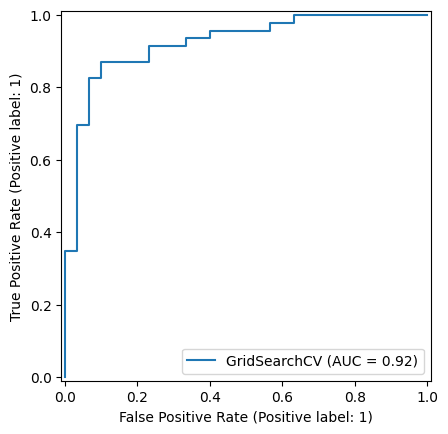

In [44]:
# Plot ROC curve and calculate AUC score.

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

**Confusion Matrix**

In [45]:
print(confusion_matrix(y_test, y_preds))

[[27  3]
 [ 6 40]]


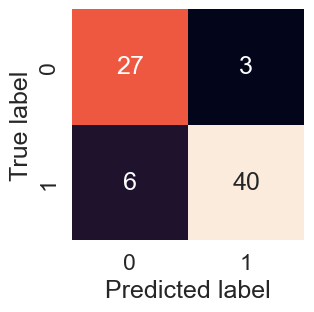

In [46]:
# Visualizing the confusion matrix using seaborne
sns.set_theme(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds);

`Now we need to make a classification report and a cross-validated precision, recall and f1-score.`

In [47]:
# Classification report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.93      0.87      0.90        46

    accuracy                           0.88        76
   macro avg       0.87      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



`The classification report is a summary of the performance of a classification model, providing key metrics to evaluate its performance on a per-class basis. It typically includes several important metrics such as precision, recall, F1-score, and support for each class.`

Let's break down each concept present in the classification report:

**Precision:**

* Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
* It indicates the accuracy of positive predictions and is calculated as: 

    >Precision = True Positives / ( True Positives + False Positives )​
 
* A high precision value means that the model has fewer false positives, i.e., it makes fewer incorrect positive predictions.


**Recall (Sensitivity):**

* Recall measures the proportion of true positive predictions out of all actual positive instances in the data.
* It indicates the model's ability to correctly identify positive instances and is calculated as: 

    >Recall = True Positives / ( True Positives + False Negatives )

* A high recall value means that the model has fewer false negatives, i.e., it correctly identifies most positive instances.


**F1-score:**

* F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
* It is calculated as: 

    >F1-score = 2 * [( Precision * Recall ) / ( Precision + Recall )]

* F1-score considers both false positives and false negatives, making it a useful metric for imbalanced datasets where the classes have different frequencies.


**Support:**

* Support represents the number of actual occurrences of each class in the test dataset.
* It indicates the relative frequency of each class and is crucial for understanding the distribution of classes in the dataset.
* Support values are used to calculate precision, recall, and F1-score for each class.


`The classification report typically presents these metrics for each class in the dataset, along with an average (weighted or macro) of these metrics across all classes. It provides a comprehensive overview of the model's performance, allowing users to assess its effectiveness in distinguishing between different classes.`

### Calculating evaluating report using cross validation 

We are going to calculate accuracy, precision, recall and F1 score using cross validation and to do so we will be using `cross_val_score()`. 

In [48]:
# Checking the best hyperparameters

gs_log_reg.best_params_

{'C': 10.0,
 'class_weight': 'balanced',
 'dual': False,
 'max_iter': 50000,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 1e-05}

In [49]:
# Creating a new classifier using the best parameters

clf = LogisticRegression(C= 10.0,
                         class_weight= 'balanced',
                         dual= False,
                         max_iter= 50000,
                         penalty= 'l2',
                         solver= 'sag',
                         tol= 1e-05)

In [50]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv= 5,
                         scoring= 'accuracy')

cv_acc

array([0.80327869, 0.8852459 , 0.80327869, 0.85      , 0.71666667])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8116939890710382

In [52]:
# Cross-validated precision

cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv= 5,
                         scoring= 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8238588573593069

In [53]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv= 5,
                         scoring= 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.8424242424242424

In [54]:
# Cross-validated F1-score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv= 5,
                         scoring= 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8312390679066105

In [55]:
# Visualising the cross-validated evaluation metrics

cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precision' : cv_precision,
                           'Recall' : cv_recall,
                           'F1-score' : cv_f1 },
                            index = [0])


In [56]:
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.811694,0.823859,0.842424,0.831239


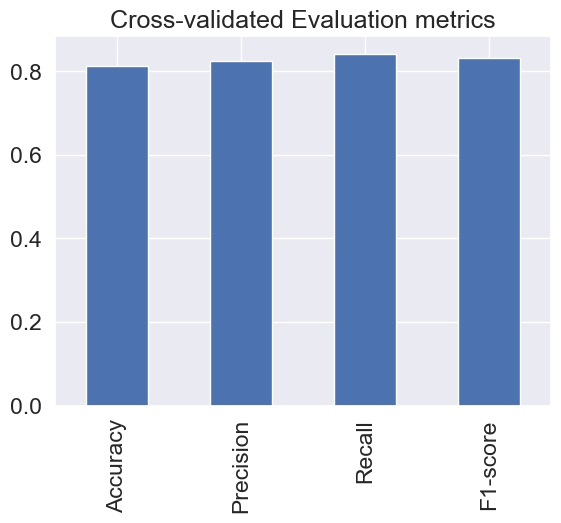

In [57]:
cv_metrics.T.plot.bar(title = 'Cross-validated Evaluation metrics',
                      legend = False);

### Feature Importance 

* Feature importance is another way of asking which feature contributed most to the outcomes of the model and how did they contribute ?
* Finding feature importance is different for different machine learning model.
* One way to find feature importance is to search ' [Model name] feature importance '

Lets find the feature importance for our Logistic regression model...

In [58]:
# Creating a new classifier using the best parameters

clf = LogisticRegression(C= 10.0,
                         class_weight= 'balanced',
                         dual= False,
                         max_iter= 50000,
                         penalty= 'l2',
                         solver= 'sag',
                         tol= 1e-05)

clf.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight='balanced', max_iter=50000,
                   solver='sag', tol=1e-05)

**Definition:**

* In logistic regression, `coefficients are numerical values assigned to each feature in the dataset during the model training process.`
* These coefficients represent the weight or importance of each feature in predicting the target variable.

**Simple Explanation:**

* Think of coefficients as the "importance scores" given to each feature by the logistic regression model.
* Larger coefficient values mean that the corresponding feature has a stronger influence on the model's predictions.
* Positive coefficients indicate that increasing the value of the feature increases the likelihood of the target class, while negative coefficients indicate the opposite.
* Coefficients essentially tell us how much each feature contributes to the decision-making process of the logistic regression model.

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
# Checking the value of coefficient 
clf.coef_

array([[ 0.01055944, -1.59631004,  0.76913477, -0.01475866, -0.00313995,
        -0.08227095,  0.54051324,  0.02717747, -0.71435356, -0.67563514,
         0.59620318, -0.66382452, -0.64603636]])

In [61]:
# Matching coefficients of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.010559437858515685,
 'sex': -1.596310037357264,
 'cp': 0.7691347686272572,
 'trestbps': -0.014758658240687188,
 'chol': -0.003139953048515616,
 'fbs': -0.08227095451834873,
 'restecg': 0.5405132432687452,
 'thalach': 0.027177469062553233,
 'exang': -0.7143535552279711,
 'oldpeak': -0.6756351422240555,
 'slope': 0.5962031800647015,
 'ca': -0.6638245215401873,
 'thal': -0.6460363568484893}

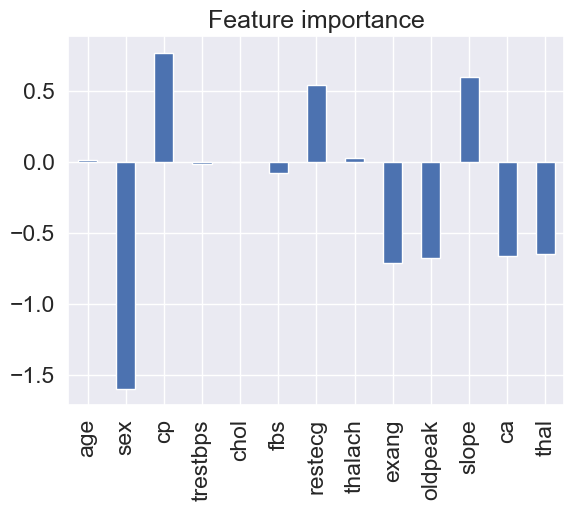

In [62]:
# Visualising feature importance

feature_df = pd.DataFrame(feature_dict, index= [0])
feature_df.T.plot.bar(title = 'Feature importance', legend = False);

In [63]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [64]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6. Experimentation 

If you havent hit your evaluation metric yet ... ask yourself :

* Could you collect more data ?
* Could you try a better model ? Like CatBoost or XGBoost ?
* Could you improve the current model ?
* If your model is good enough that is the accuracy score hit the evaluation metric ... how would you import the model for sharing it ?

### Improving the current model

Certainly! Here are several strategies you can use to increase the accuracy of a logistic regression model:

1. **Feature Engineering:**
   - Identify and select relevant features that have a strong relationship with the target variable. Remove irrelevant or redundant features.
   - Create new features through transformations, interactions, or polynomial features if they can better capture the underlying patterns in the data.

2. **Data Preprocessing:**
   - Handle missing values appropriately by imputation or deletion.
   - Normalize or standardize numerical features to ensure they have similar scales.
   - Encode categorical variables using techniques like one-hot encoding or label encoding.

3. **Hyperparameter Tuning:**
   - Experiment with different hyperparameters such as regularization strength (`C`), penalty type (`penalty`), solver algorithm (`solver`), and maximum iterations (`max_iter`).
   - Use techniques like grid search or random search to find the optimal combination of hyperparameters that maximize performance.

4. **Address Class Imbalance:**
   - If your dataset has imbalanced classes, consider using techniques like class weighting, oversampling, or undersampling to balance the class distribution.
   - Adjust the `class_weight` hyperparameter to penalize misclassifications of the minority class more heavily.

5. **Cross-Validation:**
   - Perform cross-validation to evaluate model performance on multiple subsets of the data.
   - Use techniques like k-fold cross-validation to ensure that the model's performance is consistent across different data splits and to prevent overfitting.

6. **Ensemble Methods:**
   - Consider using ensemble methods such as bagging (e.g., Random Forest) or boosting (e.g., Gradient Boosting) to combine multiple weak learners into a stronger model.
   - Ensemble methods can often improve predictive performance compared to individual models.

7. **Regularization:**
   - Apply regularization techniques such as L1 regularization (Lasso) or L2 regularization (Ridge) to prevent overfitting and improve generalization.
   - Tune the regularization strength (`C`) to find the optimal balance between bias and variance.

8. **Error Analysis:**
   - Analyze the model's errors to identify common patterns or types of mistakes.
   - Use this information to refine feature engineering, data preprocessing, or model tuning strategies.

By applying these strategies systematically and iteratively, you can incrementally improve the accuracy of your logistic regression model and achieve better predictive performance on your dataset.


#### **Ensemble methods :**

1. **Bagging (Bootstrap Aggregating):**

* Bagging involves training multiple logistic regression models on different bootstrap samples (random subsets with replacement) of the training data.
* Each logistic regression model learns from a slightly different subset of the data, leading to diverse predictions.
* To implement bagging with logistic regression, you can use scikit-learn's BaggingClassifier or RandomForestClassifier, which internally use logistic regression as the base estimator.
* Simply said :
    * Bagging is like asking many friends for advice on a decision, then combining their answers to make your decision.
    * In bagging with logistic regression, we train many logistic regression models, each on a slightly different set of our data.
    * Each model gives its own prediction, and we combine these predictions to make our final prediction.
    * It helps reduce the chance of overfitting and makes our predictions more stable.

2. **Boosting:**

* Boosting sequentially trains multiple logistic regression models, with each subsequent model focusing on the instances that the previous models misclassified.
* `Gradient Boosting` and `AdaBoost` are popular boosting algorithms that can be used with logistic regression as base estimators.
* To implement boosting with logistic regression, you can use scikit-learn's `GradientBoostingClassifier` or `AdaBoostClassifier`.
* Simply said :
    * Boosting is like learning from your mistakes and getting better over time.
    * In boosting with logistic regression, we start with a simple logistic regression model and focus on the data points it got wrong.
    * Then, we train another logistic regression model, giving more weight to the points the first model got wrong.
    * We repeat this process, with each new model focusing more on the mistakes of the previous models.
    * By combining all these models, we create a strong predictor that learns from its mistakes and improves its accuracy over time.

In [65]:
from sklearn.ensemble import BaggingClassifier

# Creating a new classifier using best parameters

clf = LogisticRegression(C= 10.0,
                         class_weight= 'balanced',
                         dual= False,
                         max_iter= 50000,
                         penalty= 'l2',
                         solver= 'sag',
                         tol= 1e-05)

# Initialize bagging classifier with logistic regression as base estimator
bagging_model = BaggingClassifier(clf)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
predictions = bagging_model.predict(X_test)

In [66]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [67]:
y_test

104    1
100    1
125    1
69     1
83     1
      ..
220    0
76     1
258    0
22     1
44     1
Name: target, Length: 76, dtype: int64

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.91      0.87      0.89        46

    accuracy                           0.87        76
   macro avg       0.86      0.87      0.86        76
weighted avg       0.87      0.87      0.87        76



In [69]:
bagging_model.score(X_test, y_test)

0.868421052631579

In [70]:
# Cross-validated accuracy

bag_cv_accuracy = cross_val_score(bagging_model,
                         X,
                         y,
                         cv= 5,
                         scoring= 'accuracy')

bag_cv_accuracy = np.mean(bag_cv_accuracy)
bag_cv_accuracy

0.8150273224043716

### CatBoost classifier 

In [71]:
from catboost import CatBoostClassifier

# Define CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

0:	learn: 0.6568674	total: 165ms	remaining: 16.4s
1:	learn: 0.6306591	total: 167ms	remaining: 8.2s
2:	learn: 0.6069158	total: 169ms	remaining: 5.47s
3:	learn: 0.5825489	total: 171ms	remaining: 4.09s
4:	learn: 0.5624407	total: 172ms	remaining: 3.27s
5:	learn: 0.5462331	total: 173ms	remaining: 2.71s
6:	learn: 0.5264663	total: 175ms	remaining: 2.32s
7:	learn: 0.5088767	total: 176ms	remaining: 2.02s
8:	learn: 0.4907112	total: 178ms	remaining: 1.79s
9:	learn: 0.4733793	total: 181ms	remaining: 1.63s
10:	learn: 0.4613357	total: 183ms	remaining: 1.48s
11:	learn: 0.4469300	total: 183ms	remaining: 1.34s
12:	learn: 0.4345061	total: 185ms	remaining: 1.24s
13:	learn: 0.4215829	total: 187ms	remaining: 1.15s
14:	learn: 0.4103582	total: 188ms	remaining: 1.06s
15:	learn: 0.4010464	total: 190ms	remaining: 995ms
16:	learn: 0.3925095	total: 191ms	remaining: 934ms
17:	learn: 0.3842108	total: 194ms	remaining: 882ms
18:	learn: 0.3750582	total: 196ms	remaining: 837ms
19:	learn: 0.3670483	total: 198ms	remainin

In [72]:
# Define hyperparameter grid
param_grid = {
    'iterations': [80],
    'learning_rate': [0.06],
    'depth': [4],
    'l2_leaf_reg' : [3],
    'border_count' : [75],
    'early_stopping_rounds': [5],
    'bootstrap_type' : ['MVS']
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

0:	learn: 0.6713717	total: 57.1ms	remaining: 4.51s
1:	learn: 0.6499825	total: 58ms	remaining: 2.26s
2:	learn: 0.6321780	total: 58.8ms	remaining: 1.51s
3:	learn: 0.6182355	total: 59.4ms	remaining: 1.13s
4:	learn: 0.6034449	total: 60ms	remaining: 900ms
5:	learn: 0.5882412	total: 60.6ms	remaining: 747ms
6:	learn: 0.5730823	total: 61.1ms	remaining: 638ms
7:	learn: 0.5578382	total: 61.7ms	remaining: 555ms
8:	learn: 0.5492861	total: 62.3ms	remaining: 491ms
9:	learn: 0.5355218	total: 62.8ms	remaining: 440ms
10:	learn: 0.5236609	total: 63.4ms	remaining: 398ms
11:	learn: 0.5158870	total: 64ms	remaining: 363ms
12:	learn: 0.5073896	total: 64.5ms	remaining: 333ms
13:	learn: 0.4964338	total: 65.1ms	remaining: 307ms
14:	learn: 0.4873662	total: 67.1ms	remaining: 291ms
15:	learn: 0.4801753	total: 69.4ms	remaining: 277ms
16:	learn: 0.4708458	total: 70ms	remaining: 259ms
17:	learn: 0.4644034	total: 70.5ms	remaining: 243ms
18:	learn: 0.4562464	total: 71.1ms	remaining: 228ms
19:	learn: 0.4489564	total: 71

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002516D6B4310>,
             param_grid={'bootstrap_type': ['MVS'], 'border_count': [75],
                         'depth': [4], 'early_stopping_rounds': [5],
                         'iterations': [80], 'l2_leaf_reg': [3],
                         'learning_rate': [0.06]},
             scoring='accuracy')

In [73]:
grid_search.score(X_test, y_test)

0.8552631578947368

In [74]:
grid_search.best_params_

{'bootstrap_type': 'MVS',
 'border_count': 75,
 'depth': 4,
 'early_stopping_rounds': 5,
 'iterations': 80,
 'l2_leaf_reg': 3,
 'learning_rate': 0.06}

In [75]:
cat_b = CatBoostClassifier(iterations=80, learning_rate=0.06, depth=4, l2_leaf_reg= 3, border_count= 75, early_stopping_rounds=5, bootstrap_type='MVS')
cat_b.fit(X_train, y_train)

accuracy = cross_val_score(cat_b,
                         X,
                         y,
                         cv= 5,
                         scoring= 'accuracy')

accuracy = np.mean(accuracy)
accuracy

0:	learn: 0.6752110	total: 2.2ms	remaining: 174ms
1:	learn: 0.6607019	total: 3.07ms	remaining: 120ms
2:	learn: 0.6461774	total: 3.8ms	remaining: 97.6ms
3:	learn: 0.6306292	total: 4.38ms	remaining: 83.3ms
4:	learn: 0.6177911	total: 5.13ms	remaining: 76.9ms
5:	learn: 0.6031028	total: 5.83ms	remaining: 71.9ms
6:	learn: 0.5904721	total: 6.64ms	remaining: 69.2ms
7:	learn: 0.5786299	total: 7.3ms	remaining: 65.7ms
8:	learn: 0.5685838	total: 9.79ms	remaining: 77.3ms
9:	learn: 0.5568081	total: 10.5ms	remaining: 73.5ms
10:	learn: 0.5457225	total: 11.1ms	remaining: 69.4ms
11:	learn: 0.5363706	total: 11.6ms	remaining: 66ms
12:	learn: 0.5274464	total: 12.2ms	remaining: 62.9ms
13:	learn: 0.5173604	total: 12.8ms	remaining: 60.4ms
14:	learn: 0.5094950	total: 13.5ms	remaining: 58.4ms
15:	learn: 0.5029465	total: 14.1ms	remaining: 56.4ms
16:	learn: 0.4964297	total: 14.7ms	remaining: 54.6ms
17:	learn: 0.4897811	total: 15.3ms	remaining: 52.7ms
18:	learn: 0.4817345	total: 15.9ms	remaining: 50.9ms
19:	learn:

0.8612021857923498

In [76]:
precision = cross_val_score(cat_b,
                         X,
                         y,
                         cv= 5,
                         scoring= 'precision')

precision = np.mean(precision)
precision

0:	learn: 0.6745214	total: 913us	remaining: 72.1ms


1:	learn: 0.6584540	total: 2.19ms	remaining: 85.3ms
2:	learn: 0.6440620	total: 3.34ms	remaining: 85.8ms
3:	learn: 0.6283417	total: 4.3ms	remaining: 81.7ms
4:	learn: 0.6136919	total: 7.99ms	remaining: 120ms
5:	learn: 0.5993493	total: 9.23ms	remaining: 114ms
6:	learn: 0.5874081	total: 10.2ms	remaining: 106ms
7:	learn: 0.5738076	total: 11ms	remaining: 98.9ms
8:	learn: 0.5640830	total: 11.7ms	remaining: 92.6ms
9:	learn: 0.5530497	total: 12.3ms	remaining: 85.8ms
10:	learn: 0.5444177	total: 12.8ms	remaining: 80.6ms
11:	learn: 0.5341096	total: 13.4ms	remaining: 76.1ms
12:	learn: 0.5251436	total: 14ms	remaining: 72.2ms
13:	learn: 0.5155601	total: 14.5ms	remaining: 68.3ms
14:	learn: 0.5077000	total: 15ms	remaining: 65ms
15:	learn: 0.5018155	total: 15.5ms	remaining: 62.1ms
16:	learn: 0.4965576	total: 16.1ms	remaining: 59.5ms
17:	learn: 0.4898657	total: 16.6ms	remaining: 57.1ms
18:	learn: 0.4839027	total: 17.1ms	remaining: 54.9ms
19:	learn: 0.4767274	total: 17.6ms	remaining: 52.8ms
20:	learn: 0.4

0.8565381558028615

In [77]:
recall = cross_val_score(cat_b,
                         X,
                         y,
                         cv= 5,
                         scoring= 'recall')

recall = np.mean(recall)
recall

0:	learn: 0.6745214	total: 981us	remaining: 77.5ms
1:	learn: 0.6584540	total: 1.97ms	remaining: 77ms
2:	learn: 0.6440620	total: 3.06ms	remaining: 78.5ms
3:	learn: 0.6283417	total: 4.33ms	remaining: 82.3ms
4:	learn: 0.6136919	total: 5.98ms	remaining: 89.7ms
5:	learn: 0.5993493	total: 10.7ms	remaining: 131ms
6:	learn: 0.5874081	total: 11.9ms	remaining: 124ms
7:	learn: 0.5738076	total: 12.9ms	remaining: 116ms
8:	learn: 0.5640830	total: 20.2ms	remaining: 159ms
9:	learn: 0.5530497	total: 25.6ms	remaining: 179ms
10:	learn: 0.5444177	total: 26.3ms	remaining: 165ms
11:	learn: 0.5341096	total: 27.1ms	remaining: 153ms
12:	learn: 0.5251436	total: 27.8ms	remaining: 143ms
13:	learn: 0.5155601	total: 28.5ms	remaining: 134ms
14:	learn: 0.5077000	total: 30.2ms	remaining: 131ms
15:	learn: 0.5018155	total: 30.8ms	remaining: 123ms
16:	learn: 0.4965576	total: 31.4ms	remaining: 116ms
17:	learn: 0.4898657	total: 31.8ms	remaining: 110ms
18:	learn: 0.4839027	total: 32.3ms	remaining: 104ms
19:	learn: 0.4767274

14:	learn: 0.5171700	total: 12.4ms	remaining: 53.7ms
15:	learn: 0.5108664	total: 13ms	remaining: 52ms
16:	learn: 0.5045192	total: 13.5ms	remaining: 50.2ms
17:	learn: 0.4994721	total: 14ms	remaining: 48.4ms
18:	learn: 0.4932135	total: 14.5ms	remaining: 46.6ms
19:	learn: 0.4866742	total: 15ms	remaining: 44.9ms
20:	learn: 0.4796282	total: 15.4ms	remaining: 43.4ms
21:	learn: 0.4739374	total: 15.9ms	remaining: 41.9ms
22:	learn: 0.4666516	total: 16.4ms	remaining: 40.6ms
23:	learn: 0.4605178	total: 16.8ms	remaining: 39.2ms
24:	learn: 0.4554693	total: 17.3ms	remaining: 38ms
25:	learn: 0.4516247	total: 17.7ms	remaining: 36.9ms
26:	learn: 0.4459066	total: 18.2ms	remaining: 35.8ms
27:	learn: 0.4412929	total: 18.7ms	remaining: 34.7ms
28:	learn: 0.4372469	total: 19.1ms	remaining: 33.6ms
29:	learn: 0.4321751	total: 19.6ms	remaining: 32.7ms
30:	learn: 0.4267582	total: 20.1ms	remaining: 31.8ms
31:	learn: 0.4238041	total: 20.6ms	remaining: 30.8ms
32:	learn: 0.4194662	total: 21ms	remaining: 29.9ms
33:	l

0.9030303030303031

In [78]:
f1_score = cross_val_score(cat_b,
                         X,
                         y,
                         cv= 5,
                         scoring= 'f1')

f1_score = np.mean(f1_score)
f1_score

0:	learn: 0.6745214	total: 838us	remaining: 66.2ms
1:	learn: 0.6584540	total: 1.76ms	remaining: 68.5ms
2:	learn: 0.6440620	total: 2.51ms	remaining: 64.3ms
3:	learn: 0.6283417	total: 3.24ms	remaining: 61.5ms
4:	learn: 0.6136919	total: 4.17ms	remaining: 62.6ms
5:	learn: 0.5993493	total: 5.05ms	remaining: 62.3ms
6:	learn: 0.5874081	total: 6ms	remaining: 62.6ms
7:	learn: 0.5738076	total: 6.56ms	remaining: 59ms
8:	learn: 0.5640830	total: 7.09ms	remaining: 56ms
9:	learn: 0.5530497	total: 7.7ms	remaining: 53.9ms
10:	learn: 0.5444177	total: 8.9ms	remaining: 55.9ms
11:	learn: 0.5341096	total: 9.5ms	remaining: 53.9ms
12:	learn: 0.5251436	total: 10.1ms	remaining: 52.1ms
13:	learn: 0.5155601	total: 10.6ms	remaining: 50.1ms
14:	learn: 0.5077000	total: 11.4ms	remaining: 49.3ms
15:	learn: 0.5018155	total: 12ms	remaining: 47.9ms
16:	learn: 0.4965576	total: 12.5ms	remaining: 46.5ms
17:	learn: 0.4898657	total: 13.1ms	remaining: 45ms
18:	learn: 0.4839027	total: 13.5ms	remaining: 43.4ms
19:	learn: 0.47672

24:	learn: 0.4459843	total: 18.4ms	remaining: 40.5ms
25:	learn: 0.4427495	total: 19.2ms	remaining: 39.8ms
26:	learn: 0.4371709	total: 19.7ms	remaining: 38.7ms
27:	learn: 0.4331992	total: 20.2ms	remaining: 37.6ms
28:	learn: 0.4294280	total: 21ms	remaining: 36.9ms
29:	learn: 0.4249390	total: 22.2ms	remaining: 37.1ms
30:	learn: 0.4206917	total: 22.9ms	remaining: 36.2ms
31:	learn: 0.4173531	total: 23.4ms	remaining: 35.1ms
32:	learn: 0.4136408	total: 23.8ms	remaining: 33.9ms
33:	learn: 0.4097505	total: 24.3ms	remaining: 32.9ms
34:	learn: 0.4068087	total: 24.8ms	remaining: 31.9ms
35:	learn: 0.4033719	total: 25.3ms	remaining: 31ms
36:	learn: 0.3985427	total: 25.9ms	remaining: 30.1ms
37:	learn: 0.3943027	total: 26.5ms	remaining: 29.3ms
38:	learn: 0.3911706	total: 26.9ms	remaining: 28.3ms
39:	learn: 0.3880379	total: 27.4ms	remaining: 27.4ms
40:	learn: 0.3841853	total: 27.9ms	remaining: 26.5ms
41:	learn: 0.3812709	total: 28.4ms	remaining: 25.7ms
42:	learn: 0.3783974	total: 28.9ms	remaining: 24.9

0.8775539733217099

In [79]:
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.811694,0.823859,0.842424,0.831239


In [80]:
# Visualising the cross-validated evaluation metrics

cat_b_metrics = pd.DataFrame({'Accuracy' : accuracy,
                           'Precision' : precision,
                           'Recall' : recall,
                           'F1-score' : cv_f1 },
                            index = [0])
cat_b_metrics

,Accuracy,Precision,Recall,F1-score
0,0.861202,0.856538,0.90303,0.831239


### XGBoost 

In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb.score(X_test, y_test)

0.8026315789473685

In [85]:
xgb_base_preds = xgb.predict(X_test)
xgb_base_acc = accuracy_score(y_test, xgb_base_preds)
xgb_base_acc

0.8026315789473685

In [314]:
xgb_base_recall = recall_score(y_test, xgb_base_preds)
xgb_base_recall

0.8260869565217391

In [194]:
xgb_hyperparameters = {
    'n_estimators': [200],
    'learning_rate': [0.05],
    'max_depth': [3],
    'min_child_weight': [1],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0.6],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_gs = GridSearchCV(xgb,
                      param_grid = xgb_hyperparameters,
                      cv= 5,
                      verbose= True,
                      error_score= 'raise')

xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [1.0], 'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.05], 'max_depth': [3],
                         'min_child_weight': [1], 'n_estimators': [200],
                         'reg_alpha': [0.6], 'reg_lambda': [1],
                         'scale_pos_weight': [1], 'subsample': [1.0]},
             verbose=True)

In [195]:
xgb_gs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'reg_alpha': 0.6,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1.0}

In [344]:
xgb = XGBClassifier(n_estimators = 200,                   
                    learning_rate = 0.06,
                    max_depth = 1,
                    min_child_weight = 1,
                    subsample = 1.0,
                    colsample_bytree = 0.5,
                    reg_alpha = 0.1,
                    reg_lambda = 0.5,
                    scale_pos_weight = 2,
                    gamma = 0.1)

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.881578947368421

In [310]:
xgb_accuracy = cross_val_score(xgb,
                         X,
                         y,
                         cv= 10,
                         scoring= 'accuracy')

xgb_accuracy = np.mean(xgb_accuracy)
xgb_accuracy

0.821505376344086

In [311]:
xgb_precision = cross_val_score(xgb,
                         X,
                         y,
                         cv= 10,
                         scoring= 'precision')

xgb_precision = np.mean(xgb_precision)
xgb_precision

0.7875730994152047

In [313]:
xgb_recall = cross_val_score(xgb,
                         X,
                         y,
                         cv= 5,
                         scoring= 'recall')

xgb_recall = np.mean(xgb_recall)
xgb_recall

0.9454545454545455

In [312]:
xgb_f1_score = cross_val_score(xgb,
                         X,
                         y,
                         cv= 5,
                         scoring= 'f1')

xgb_f1_score = np.mean(xgb_f1_score)
xgb_f1_score

0.8574204671684285

In [315]:
# Visualising the cross-validated evaluation metrics

xgb_metrics = pd.DataFrame({'Accuracy' : xgb_accuracy,
                           'Precision' : xgb_precision,
                           'Recall' : xgb_recall,
                           'F1-score' : xgb_f1_score },
                            index = [0])
xgb_metrics

,Accuracy,Precision,Recall,F1-score
0,0.821505,0.787573,0.945455,0.85742


In [316]:
cat_b_metrics

,Accuracy,Precision,Recall,F1-score
0,0.861202,0.856538,0.90303,0.831239


In [317]:
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.811694,0.823859,0.842424,0.831239


In [333]:
overall_metric = pd.DataFrame({'Accuracy' : [cv_acc, accuracy, xgb_accuracy],
                               'Precision' : [cv_precision, precision, xgb_precision],
                               'Recall' : [cv_recall, recall, xgb_recall],
                               'F1 score' : [cv_f1, f1_score, xgb_f1_score]},
                                index = ['Logistic Regression', 'CatBoost Classifier', 'XGBoost Classifier'])
overall_metric_per = round(overall_metric * 100, 2)
overall_metric_per = overall_metric_per.T
overall_metric_per

,Logistic Regression,CatBoost Classifier,XGBoost Classifier
Accuracy,81.17,86.12,82.15
Precision,82.39,85.65,78.76
Recall,84.24,90.30,94.55
F1 score,83.12,87.76,85.74


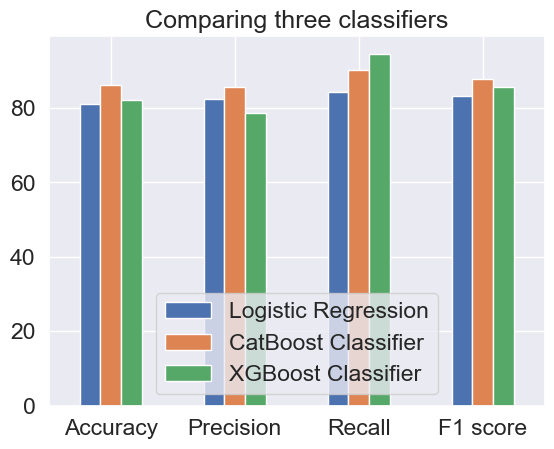

In [337]:
overall_metric_per.plot.bar(title = 'Comparing three classifiers',
                            legend = True);
plt.xticks(rotation = 0);

In [384]:
def cv_eval_metric(name, model) :

    model_name = str(name)

    accuracy = cross_val_score(model,
                         X,
                         y,
                         cv= 5,
                         scoring= 'accuracy')
    accuracy = np.mean(accuracy)

    precision = cross_val_score(model,
                         X,
                         y,
                         cv= 5,
                         scoring= 'precision')
    precision = np.mean(precision)

    recall = cross_val_score(model,
                         X,
                         y,
                         cv= 5,
                         scoring= 'recall')
    recall = np.mean(recall)

    f1_score = cross_val_score(model,
                         X,
                         y,
                         cv= 5,
                         scoring= 'f1')

    f1_score = np.mean(f1_score)


    metric_name = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    metrics_var = [accuracy, precision, recall, f1_score]
    metrics = dict(zip(metric_name, metrics_var))

    
    return model_name, metrics

In [396]:
model_name, metrics = cv_eval_metric('XGboost', xgb)

# Create DataFrame directly from dictionary
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=[model_name])

metrics_df


,XGboost
Accuracy,0.828197
Precision,0.785189
Recall,0.945455
F1 score,0.857420
